In [1]:
import pandas as pd
import numpy as np
import os
import glob

# 数据导入&处理

In [ ]:
path = "data/travel_mode/"
mode_file_paths = os.path.join(path, "*.xlsx")

In [ ]:
# path = r'D:\python\JupyterWorkSpace\Paper\initial_data'
# mode_file_paths = glob.glob(os.path.join((path+"\\mode"), "*.xlsx"))

## 出行数据

In [ ]:
df_modes = []
for mode_file_path in mode_file_paths:
    mode_name = mode_file_path[51:-5]
    mode = pd.read_excel(mode_file_path)
    mode_num = pd.DataFrame(mode.groupby('o_xz_name').sum()['num_total'])
    mode_num.columns = mode_num.columns + '_' + mode_name
    df_modes.append(mode_num)

In [4]:
df_mode = pd.concat(df_modes, axis=1)
## 计算街道各个出行方式百分比
df_mode['total'] = df_mode.sum(axis=1)
df_mode = df_mode.div(df_mode['total'], axis=0)
## 修改列名称
df_mode.columns = [x.replace('num_total', 'ratio') for x in  df_mode.columns]

In [5]:
df_mode

ratio_bus  ratio_car  ratio_subway  ratio_walk  total
o_xz_name                                                       
七宝镇         0.156912   0.265274      0.464026    0.113788    1.0
万祥镇         0.212711   0.488786      0.049542    0.248960    1.0
万里街道办事处     0.162527   0.189034      0.534701    0.113738    1.0
三星镇         0.103113   0.663084      0.000421    0.233382    1.0
三林镇         0.180022   0.179394      0.536464    0.104120    1.0
...              ...        ...           ...         ...    ...
高东镇         0.228221   0.465826      0.120457    0.185497    1.0
高境镇         0.240660   0.347034      0.240728    0.171578    1.0
高桥镇         0.241403   0.384572      0.208715    0.165310    1.0
高行镇         0.220228   0.252630      0.397770    0.129373    1.0
龙华街道办事处     0.162135   0.151300      0.596199    0.090366    1.0

[216 rows x 5 columns]

## 聚类数据

In [6]:
df_cluster = pd.read_excel(r'D:\python\JupyterWorkSpace\Paper\initial_data\cluster_parameters.xlsx', 
                           index_col = 'o_name')

In [7]:
## 定义normalize 方程
def normalize_column(df, selected_column_name):
    adjusted_name = '{}_adj'.format(selected_column_name)
    df[adjusted_name] = (df[selected_column_name] - df[selected_column_name].mean())/(df[selected_column_name].std())
    df[adjusted_name] = (df[adjusted_name] - min(df[adjusted_name]))/max(df[adjusted_name])

In [8]:
for i in df_cluster.columns[1:]:
    if 'adj' not in i: 
        ## normalize参数
        normalize_column(df_cluster, i)

In [9]:
df_cluster = df_cluster[[x for x in df_cluster.columns if 'adj' in x]]

## 街道数据

In [10]:
df_street = pd.read_excel(path+'\street_info.xlsx', index_col = "街道名")

In [11]:
df_street = pd.DataFrame(df_street['区县名'])

## 城市空间数据

In [12]:
df_ef = pd.read_excel(path+'\ef_factors.xls', index_col = "乡镇名称")
df_ef.pop('Unnamed: 0')
df_ef.columns

Index(['区县名称', '乡镇面积（km2）', '人口数（万人）', '人口密度(万人/km2)', '公交服务覆盖率', '地铁服务覆盖率',
       '公交线路密度', '便利店密度', '超市密度', '菜市场密度', '快递点密度', '社区服务点密度', '便民服务设施密度',
       '体育设施密度', '民建开发强度', '公建开发强度', '乡镇道密度', '县道密度', '国道密度', '快速路密度', '省道密度',
       '路网密度', '高速路密度', '公园服务设施覆盖率', '职住平衡比例'],
      dtype='object')

In [13]:
df_ef.pop('乡镇面积（km2）')
df_ef.pop('人口数（万人）')
df_ef.head()

区县名称  人口密度(万人/km2)   公交服务覆盖率  地铁服务覆盖率    公交线路密度     便利店密度      超市密度   
乡镇名称                                                                       
三星镇   崇明区      0.042050  0.000000      0.0  1.007672  0.701382  0.039701  \
港沿镇   崇明区      0.057605  0.000000      0.0  0.871068  1.083759  0.082311   
庙镇    崇明区      0.046016  0.088412      0.0  1.019933  0.808097  0.056908   
中兴镇   崇明区      0.047433  0.000000      0.0  1.390692  1.374672  0.085917   
绿华镇   崇明区      0.027164  0.677459      0.0  0.765583  0.413148  0.061972   

         菜市场密度     快递点密度   社区服务点密度  ...  公建开发强度     乡镇道密度      县道密度  国道密度   
乡镇名称                                ...                                     
三星镇   0.013234  0.013234  0.066168  ...     0.0  0.256661  0.254505   0.0  \
港沿镇   0.000000  0.082311  0.109748  ...     0.0  0.335508  0.346160   0.0   
庙镇    0.011382  0.056908  0.102435  ...     0.0  0.382846  0.221472   0.0   
中兴镇   0.000000  0.107396  0.150355  ...     0.0  0.738545  0.291810   0.0   
绿华镇   0.000000  0.020657  0.061972  ...     0.0  0.507413  0.179793   0.0   

      快速路密度      省道密度      路网密度     高速路密度  公园服务设施覆盖率     职住平衡比例  
乡镇名称                                                             
三星镇     0.0  0.124056  0.635223  0.000000        0.0  62.549296  
港沿镇     0.0  0.031792  0.713460  0.000000        0.0  29.399076  
庙镇      0.0  0.091454  0.695772  0.000000        0.0  29.223176  
中兴镇     0.0  0.077302  1.178090  0.070433        0.0  23.361046  
绿华镇     0.0  0.000000  0.687206  0.000000        0.0  17.259690  

[5 rows x 23 columns]

## 数据合并

In [14]:
df = pd.concat([df_ef, df_cluster,df_mode], axis=1)
df.pop('total')
df.columns

Index(['区县名称', '人口密度(万人/km2)', '公交服务覆盖率', '地铁服务覆盖率', '公交线路密度', '便利店密度', '超市密度',
       '菜市场密度', '快递点密度', '社区服务点密度', '便民服务设施密度', '体育设施密度', '民建开发强度', '公建开发强度',
       '乡镇道密度', '县道密度', '国道密度', '快速路密度', '省道密度', '路网密度', '高速路密度', '公园服务设施覆盖率',
       '职住平衡比例', '商场参数_adj', '产业园区参数_adj', '公司企业参数_adj', '政府办公参数_adj',
       'ratio_bus', 'ratio_car', 'ratio_subway', 'ratio_walk'],
      dtype='object')

In [15]:
columns_eng=['district', 'population_density', 'bus_coverage_rate','subway_coverage_rate','bus_route_density',
            'convinience_store_density','supermarket_density','wet_market_density','courier_point_density',
            'community_service_facility_density', 'public_service_facility_density',
            'stadium_density', 'residential_building_development_level','public_building_development_level',
            'town_road_density', 'prefectural_road_density',
            'national_road_density', 'expressway_density','provincial_road_density',
            'road_network_density', 'highway_density', 'park_coverage_rate', 'job_housing_balance',
            'shopping_center_cluster_parameter_adj', 'industrial_park_cluster_parameter_adj', 
             'corporate&entreprise_cluster_parameter_adj',
            'government_office_cluster_parameter_adj',
             'ratio_bus', 'ratio_car', 'ratio_subway', 'ratio_walk']

In [16]:
print(len(df.columns), len(columns_eng))

31 31


In [17]:
df.columns = columns_eng

In [18]:
X = df[df.columns[1:-4]]
Y = df[df.columns[-4:]]

In [19]:
X

population_density  bus_coverage_rate  subway_coverage_rate   
三星镇                 0.042050           0.000000              0.000000  \
港沿镇                 0.057605           0.000000              0.000000   
庙镇                  0.046016           0.088412              0.000000   
中兴镇                 0.047433           0.000000              0.000000   
绿华镇                 0.027164           0.677459              0.000000   
...                      ...                ...                   ...   
浦兴路街道办事处            1.489086           0.976975              0.815274   
控江路街道办事处            4.120483           0.947763              0.960374   
宜川路街道办事处            3.964975           0.864063              0.921290   
东明路街道办事处            0.977856           0.937232              0.812823   
古美街道办事处             1.614613           0.922808              0.727135   

          bus_route_density  convinience_store_density  supermarket_density   
三星镇                1.007672                   0.701382             0.039701  \
港沿镇                0.871068                   1.083759             0.082311   
庙镇                 1.019933                   0.808097             0.056908   
中兴镇                1.390692                   1.374672             0.085917   
绿华镇                0.765583                   0.413148             0.061972   
...                     ...                        ...                  ...   
浦兴路街道办事处          12.977459                  11.377317             4.713460   
控江路街道办事处          18.647163                  21.383970             8.078389   
宜川路街道办事处          25.451309                  17.200426            10.033582   
东明路街道办事处          18.725519                   9.575740             3.755192   
古美街道办事处           13.191967                  12.787168             4.409368   

          wet_market_density  courier_point_density   
三星镇                 0.013234               0.013234  \
港沿镇                 0.000000               0.082311   
庙镇                  0.011382               0.056908   
中兴镇                 0.000000               0.107396   
绿华镇                 0.000000               0.020657   
...                      ...                    ...   
浦兴路街道办事处            4.225861               5.851192   
控江路街道办事处            9.503987              10.454386   
宜川路街道办事处            6.689054               7.166844   
东明路街道办事处            2.816394               2.440875   
古美街道办事处             2.939579               3.968431   

          community_service_facility_density  public_service_facility_density   
三星镇                                 0.066168                         0.185271  \
港沿镇                                 0.109748                         0.315525   
庙镇                                  0.102435                         0.261778   
中兴镇                                 0.150355                         0.343668   
绿华镇                                 0.061972                         0.247889   
...                                      ...                              ...   
浦兴路街道办事处                            4.875993                        18.041174   
控江路街道办事处                            3.801595                        28.511961   
宜川路街道办事处                            9.555792                        29.622955   
东明路街道办事处                            3.379673                        17.837162   
古美街道办事处                             6.908010                        17.784452   

          ...  expressway_density  provincial_road_density   
三星镇       ...            0.000000                 0.124056  \
港沿镇       ...            0.000000                 0.031792   
庙镇        ...            0.000000                 0.091454   
中兴镇       ...            0.000000                 0.077302   
绿华镇       ...            0.000000                 0.000000   
...       ...                 ...                      ...   
浦兴路街道办事处  ...            0.167076                 0.000000   
控江路街道办事处  ...            1.093655                 0.00

# 数据基本研究 & 模型准备

## 相关性研究

In [20]:
import seaborn as sns
from matplotlib import pyplot as plt
from matplotlib.colors import LinearSegmentedColormap
plt.rcParams["font.sans-serif"]=["SimHei"] #设置字体
plt.rcParams["axes.unicode_minus"]=False #该语句解决图像中的“-”负号的乱码问题


In [21]:
## Create Color Map
def create_custom_colormap(color_list):
    colors = color_list
    ## 点阵密度
    n_bins = 1000
    ## 创建colormap
    cmap_name = 'custom_colormap'
    cm = LinearSegmentedColormap.from_list(cmap_name, colors, N = n_bins)
    return cm

In [22]:
## 橄榄绿色，白色，深灰色
# '#9acd32','#929591'
color_list = ['#9acd32', (1, 1, 1), (0.2, 0.2, 0.2)]
custom_cmap = create_custom_colormap(color_list)

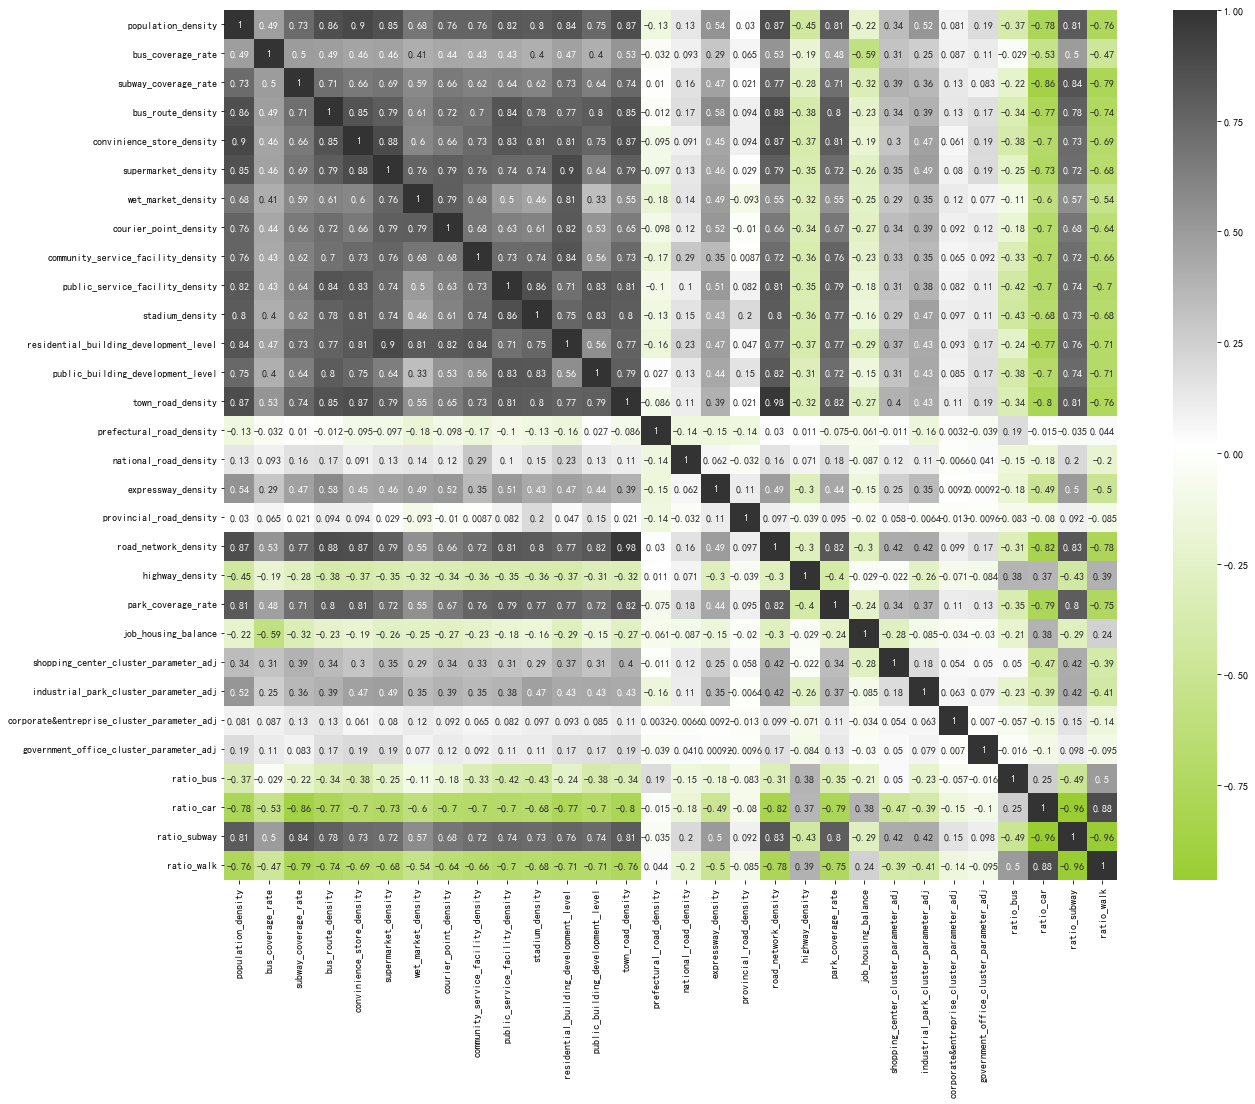

In [23]:
## 绘制相关性热力图
plt.figure(figsize=(20,16))
sns.heatmap(df.iloc[:, 1:].corr(), annot=True, cmap=custom_cmap)
plt.savefig('CorrelationPlot.png')
plt.show()

In [24]:
df.iloc[:, 1:].corr().iloc[:-4, -4:].to_excel('xy_correlation.xlsx')
xy_corr = df.iloc[:, 1:].corr().iloc[:-4, -4:]

In [25]:
df.iloc[:, 1:].corr().iloc[:-4,:-4].to_excel('xx_correlation.xlsx')
xx_corr = df.iloc[:, 1:].corr().iloc[:-4,:-4]

In [26]:
## 统计相关性强度和数量
thresholds = [0.75,0.5,0.25]
for i in thresholds:
    count = xx_corr.applymap(lambda x: x> i and x<1).sum().sum()/2
    print(i, count)

0.75 58.0
0.5 110.0
0.25 170.0


## 模型数据准备

In [27]:
from sklearn.preprocessing import normalize
from sklearn.model_selection import train_test_split
## Normalize all values for model seletion
# X1 = normalize(X, norm='l2')
X1 = normalize(X.iloc[:,:-4], norm='l2')
X1 = pd.DataFrame(X1,columns = X.columns[:-4])
X1 = X1.set_index(X.index)
X2 = pd.concat([X1, X.iloc[:,-4:]],axis=1)
# Split the model
X_train, X_valid, Y_train, Y_valid = train_test_split(X2, Y, test_size=0.2, random_state=38)

# 模型研究

## Multivariate Linear Regression

In [28]:
from sklearn.linear_model import LinearRegression, Lasso
from sklearn.model_selection import KFold, GridSearchCV
from sklearn.feature_selection import RFE

### 模型函数：LASSO

In [29]:
def lasso_model(X, y):
    ## 调参
    hyperparam = {"alpha":np.arange(0.0001, 0.2, 0.001)}
    folds = KFold(n_splits=3, shuffle=True, random_state=38)
    scoring = {"NMSE": "neg_mean_squared_error", "R2":"r2"}
    
    ## 定义&耦合模型
    model = Lasso()
    model.fit(X,y)
    
    ## 通过GridSearchCV 寻找最优情况
    model_cv = GridSearchCV(estimator=model,
                           param_grid=hyperparam,
                           scoring = scoring,
                           refit = "NMSE",
                           cv = folds,
                           n_jobs = 2,
                           verbose=1,
                           return_train_score=True)
    model_cv.fit(X, y)
    ## 保存结果
    model_output = pd.DataFrame(model_cv.cv_results_)
    return model_output

#### 可视化函数

In [40]:
def plot_train_test_score(results, tunning_range, title, x_label, legend_loc1, legend_loc12):
    ## X axis设定为自变量
    X_axis = tunning_range
    
    ## 设置标题格式
    fig, ax1 = plt.subplots(figsize = (20,12))
    plt.title("GridSearchCV Evaluation -  %s" % title, fontsize=30)
    
    ## 设置横纵坐标
    plt.xlabel("alpha value", fontsize=30)
    plt.ylabel("Score", fontsize=30)
    
    ## 设置横纵坐标标题
    ax1.set_xlabel(x_label, fontsize=30)
    ax1.set_ylabel('R2 Score', fontsize=30)
    
    ## 在ax1上绘制r2训练集和测试集结果 
    for sample, style in (("train", "--"), ("test", "-")):
        r2_score_mean = results["mean_%s_R2" % sample]
        r2_score_std = results["std_%s_R2" % sample]
        ax1.fill_between(
                X_axis,
                r2_score_mean - r2_score_std,
                r2_score_mean + r2_score_std,
                alpha=0.1 if sample == "test" else 0,
                color='g'
            )
        ax1.plot(
            X_axis,
            np.array(r2_score_mean),
            style,
            color='g',
            alpha=1 if sample == "test" else 0.7,
            label="R2 (%s)" % sample,
        )
    
    ## 设置附加纵轴ax2
    ax2 = ax1.twinx()
    ax2.set_ylabel('NMSE', fontsize=30)
    
    ## 在ax2上绘制NMSE训练集和测试集结果 
    for sample, style in (("train", "--"), ("test", "-")):
        NMSE_score_mean = results["mean_%s_NMSE" % sample]
        NMSE_score_std = results["std_%s_NMSE" % sample]
        ax2.fill_between(
                X_axis,
                NMSE_score_mean - NMSE_score_std,
                NMSE_score_mean + NMSE_score_std,
                alpha=0.1 if sample == "test" else 0,
                color='k'
            )
        ax2.plot(
            X_axis,
            np.array(NMSE_score_mean),
            style,
            color='k',
            alpha=1 if sample == "test" else 0.7,
            label="NMSE (%s)" % sample,
        )
    ## 根据图像呈现legend
    ## 通过调整legend_loc来避免legend叠加绘制现象
    ax1.legend(loc=legend_loc1, fontsize =20)
    ax2.legend(loc=legend_loc12, fontsize=20)
    plt.savefig(title+'.png')
    plt.show()

#### 准确性可视化以及模型成果保持

Fitting 3 folds for each of 200 candidates, totalling 600 fits


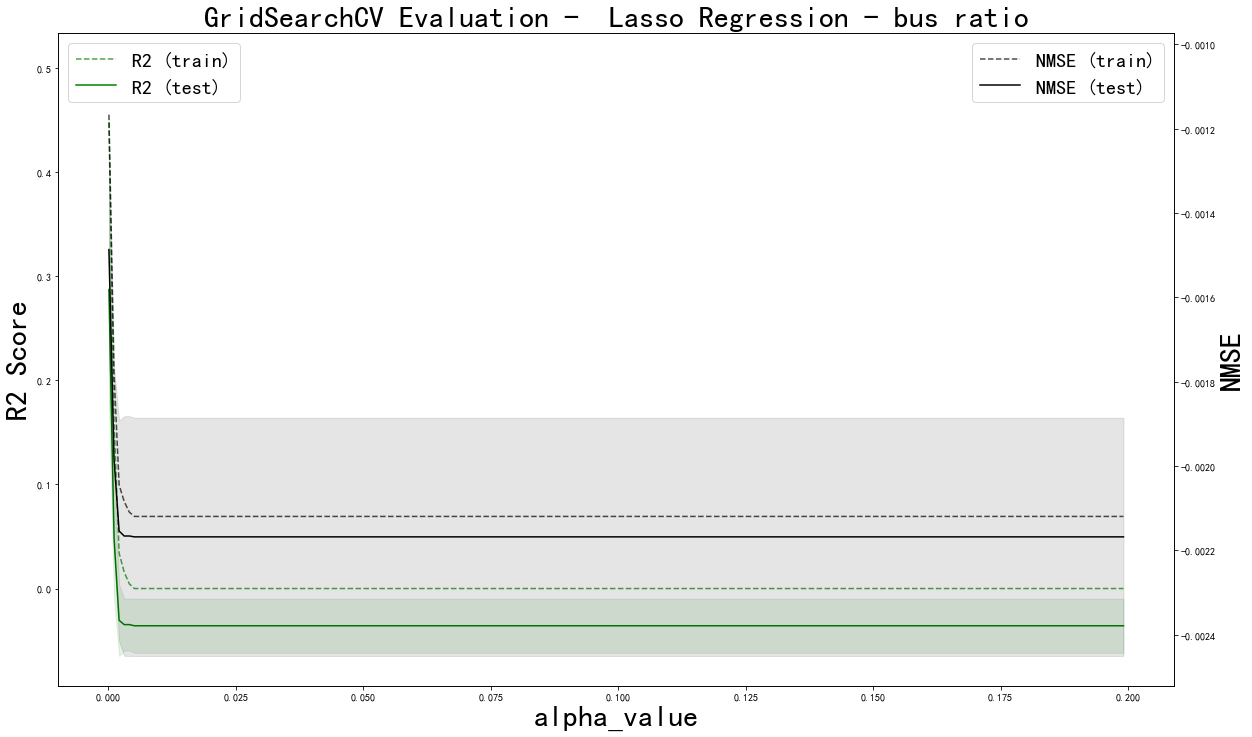

Fitting 3 folds for each of 200 candidates, totalling 600 fits


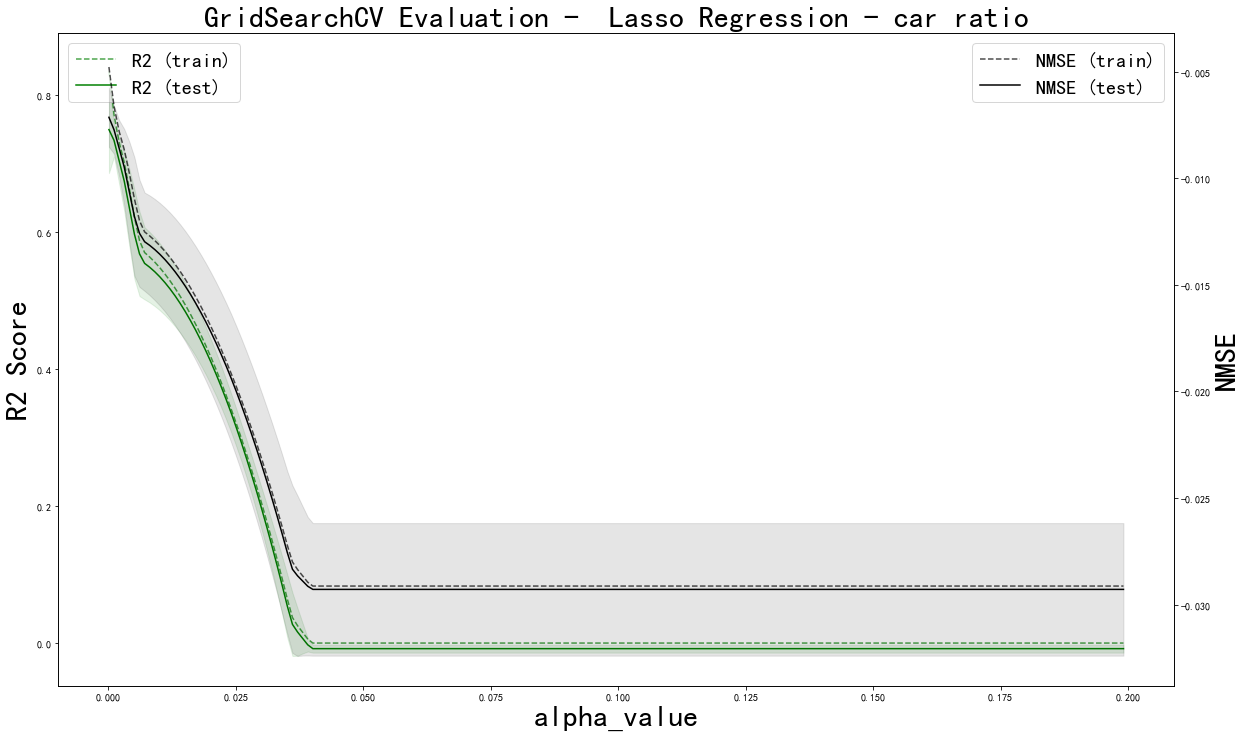

Fitting 3 folds for each of 200 candidates, totalling 600 fits


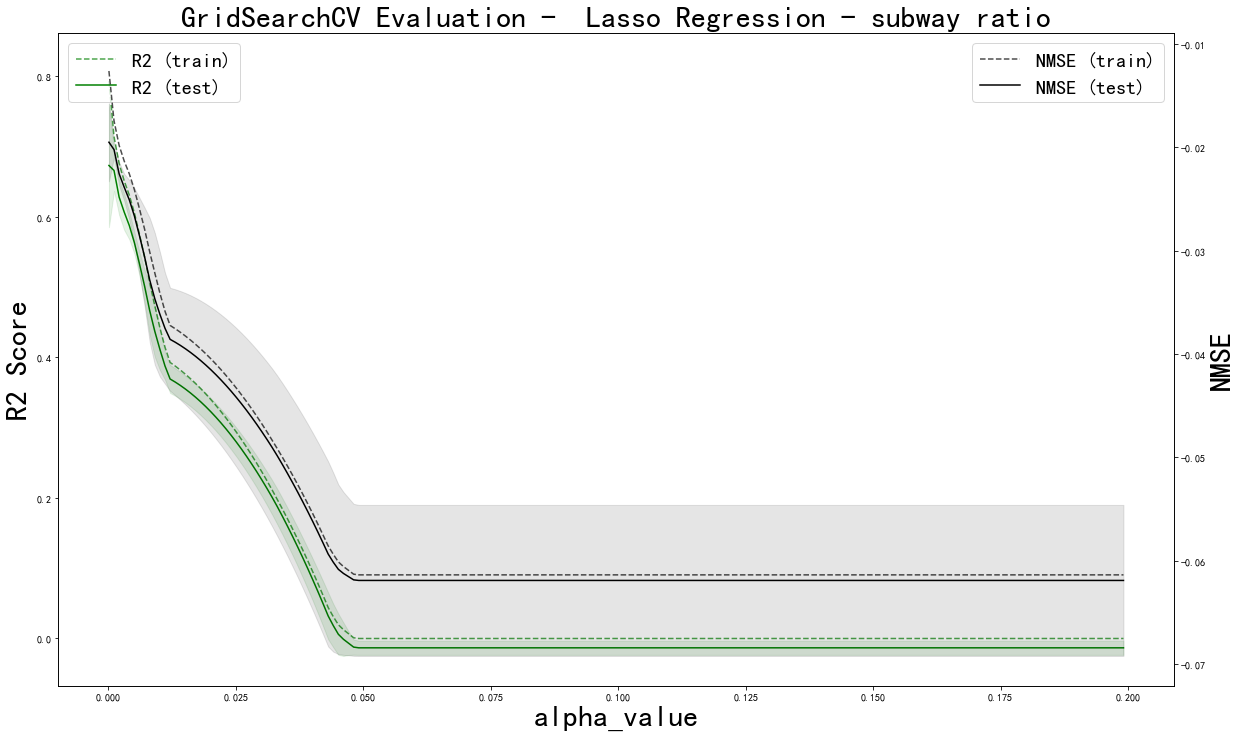

Fitting 3 folds for each of 200 candidates, totalling 600 fits


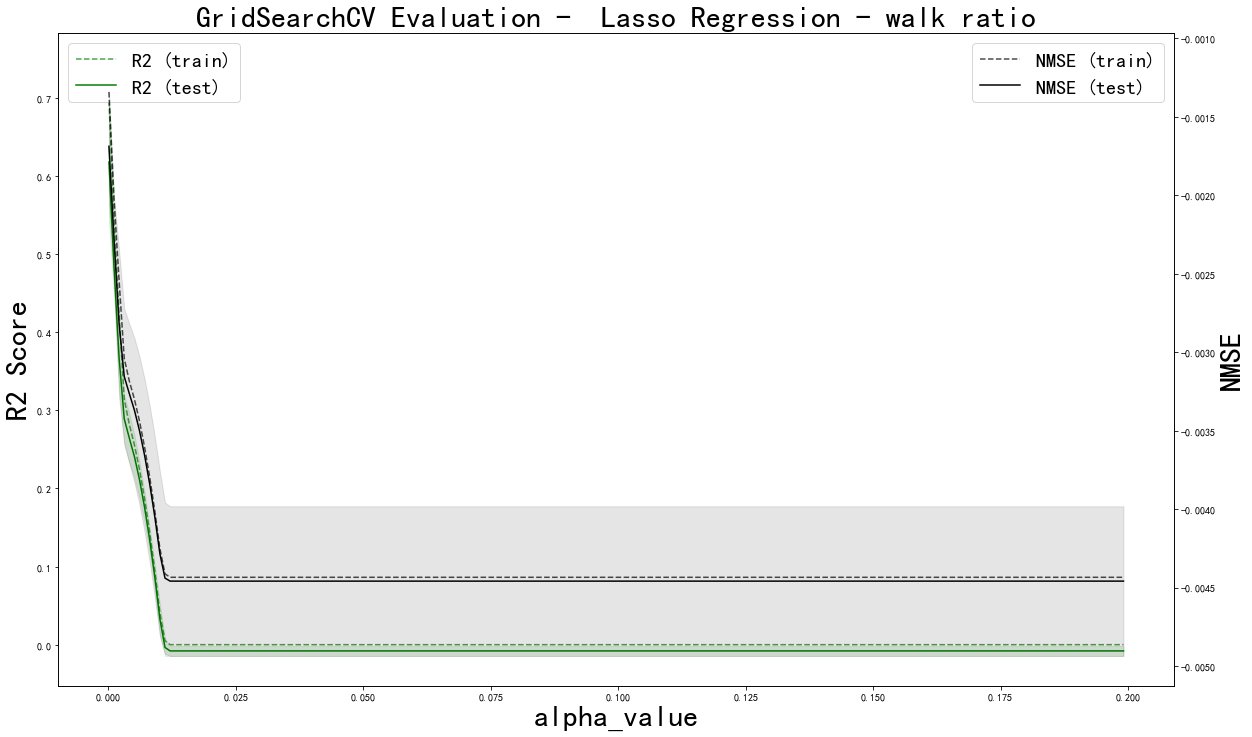

In [41]:
results_dict_lasso = {x:0 for x in Y.columns}
for key in results_dict_lasso.keys():
    results = lasso_model(X_train, Y_train[key])
    results_dict_lasso[key] = results
    title = "Lasso Regression - "+ key[6:]+' '+key[:5]
    plot_train_test_score(results, np.arange(0.0001, 0.2, 0.001),title,'alpha_value', 2,0)

### 模型函数：Prunning-Feature Selection

In [33]:
def prunning_model(X, y):
    ## 调参
    hyperparam = {"n_features_to_select":list(range(1, len(X.columns)+1))}
    folds = KFold(n_splits=3, shuffle=True, random_state=38)
    scoring = {"NMSE": "neg_mean_squared_error", "R2":"r2"}
    
    ## 定义&耦合模型
    model = LinearRegression()
    model.fit(X,y)
    rfe = RFE(model)
    
    ## 通过GridSearchCV 寻找最优情况
    model_cv = GridSearchCV(estimator=rfe,
                           param_grid=hyperparam,
                           scoring = scoring,
                           refit = "NMSE",
                           cv = folds,
                           n_jobs = 2,
                           verbose=1,
                           return_train_score=True
                           )
    model_cv.fit(X, y)
    ## 保存结果
    model_output = pd.DataFrame(model_cv.cv_results_)
    return model_output

#### 准确性可视化以及模型成果保持

Fitting 3 folds for each of 26 candidates, totalling 78 fits


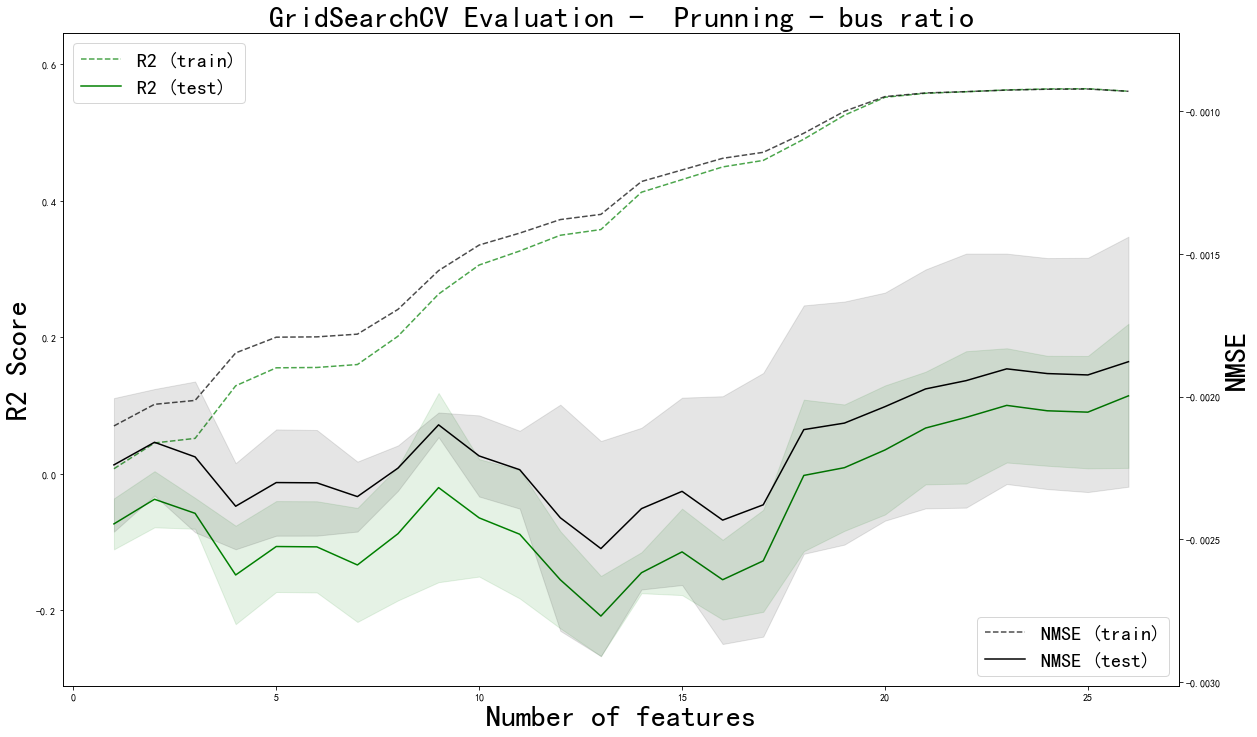

Fitting 3 folds for each of 26 candidates, totalling 78 fits


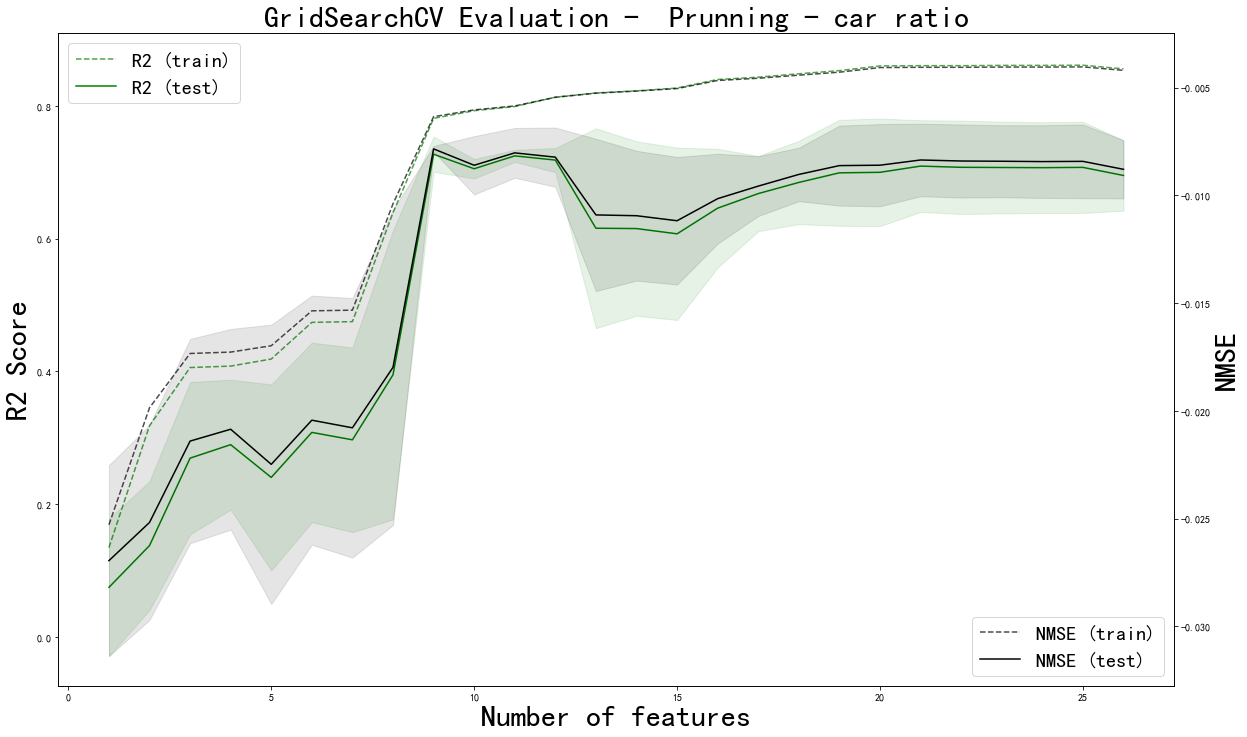

Fitting 3 folds for each of 26 candidates, totalling 78 fits


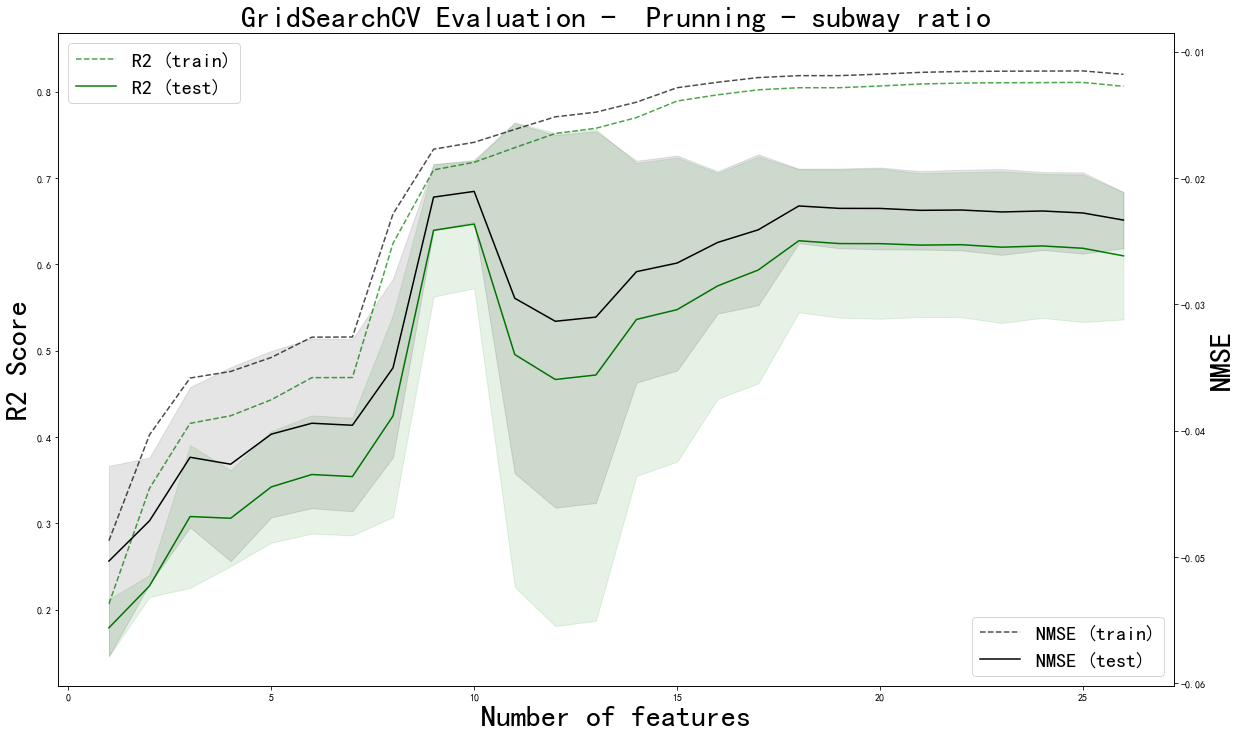

Fitting 3 folds for each of 26 candidates, totalling 78 fits


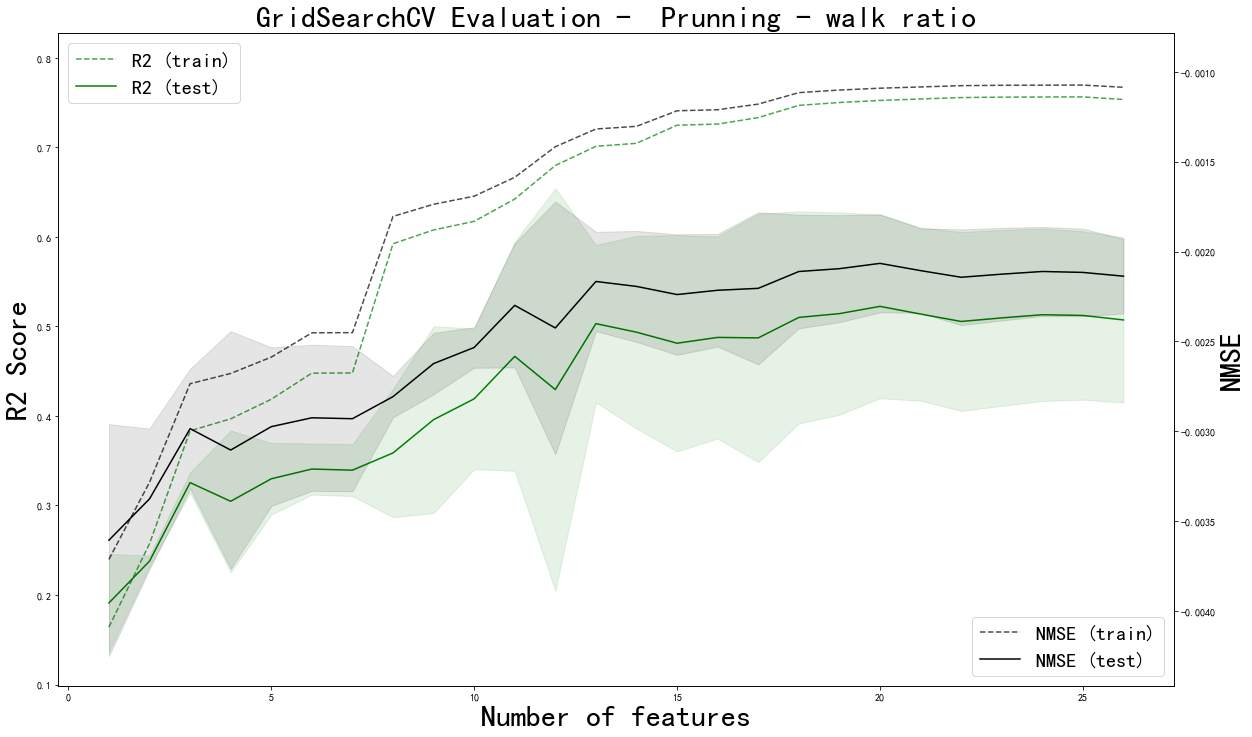

In [42]:
results_dict_pr = {x:0 for x in Y.columns}
for key in results_dict_pr.keys():
    results = prunning_model(X_train, Y_train[key])
    results_dict_pr[key] = results
    title = "Prunning - " + key[6:]+' '+key[:5]
    plot_train_test_score(results, range(1, len(X.columns)+1),title, 'Number of features', 2, 4)

## Radom Forest Regression

### 模型函数

In [36]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestRegressor

#### 模型函数 GridSearchCV
GridSearchCV中 因算力问题只研究单一hyperparameter: n_estimator

In [37]:
def rf_model_gridsearch(X, y):
    ## 调参 -- 因计算体量过大，省略部分参数计算
    n_estimators = [int(x) for x in list(range(1,201))]
#     max_features = ['auto', 'sqrt', 'log2']
#     max_depth = [int(x) for x in np.linspace(10,110,num=11)]
#     max_depth.append(None)
#     min_samples_split = [2,5,10]
#     bootstrap = [True, False]
    
    hyperparam = {
    "n_estimators": n_estimators
#     "max_features": max_features,
#     "max_depth": max_depth,
#     "min_samples_split": min_samples_split,
#     "bootstrap":bootstrap
    }

    
    folds = KFold(n_splits=5, shuffle=True, random_state=38)
    scoring = {"NMSE": "neg_mean_squared_error", "R2":"r2"}
    
    ## 定义&耦合模型
    model = RandomForestRegressor()
    model.fit(X,y)
    
    ## 通过GridSearchCV 寻找最优情况
    model_cv = GridSearchCV(estimator=model,
                           param_grid=hyperparam,
                           scoring = scoring,
                           refit = "NMSE",
                           cv = folds,
                           n_jobs = 2,
                           verbose=1,
                           return_train_score=True)
    model_cv.fit(X, y)
    ## 保存结果
    model_output = pd.DataFrame(model_cv.cv_results_)
    return model_output

In [38]:
results_dict_rf_gs = {x:0 for x in Y.columns}
for key in results_dict_rf_gs.keys():
    results = rf_model_gridsearch(X_train, Y_train[key])
    results_dict_rf_gs[key] = results

Fitting 5 folds for each of 200 candidates, totalling 1000 fits
Fitting 5 folds for each of 200 candidates, totalling 1000 fits
Fitting 5 folds for each of 200 candidates, totalling 1000 fits
Fitting 5 folds for each of 200 candidates, totalling 1000 fits


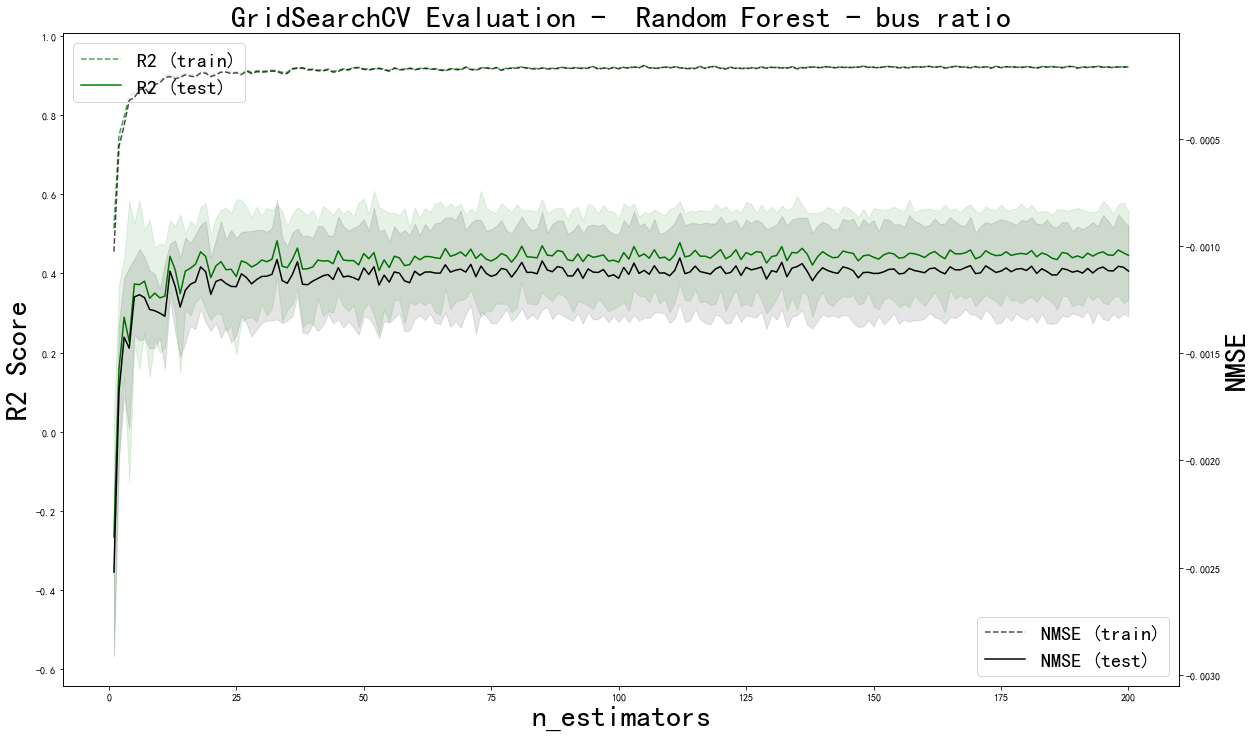

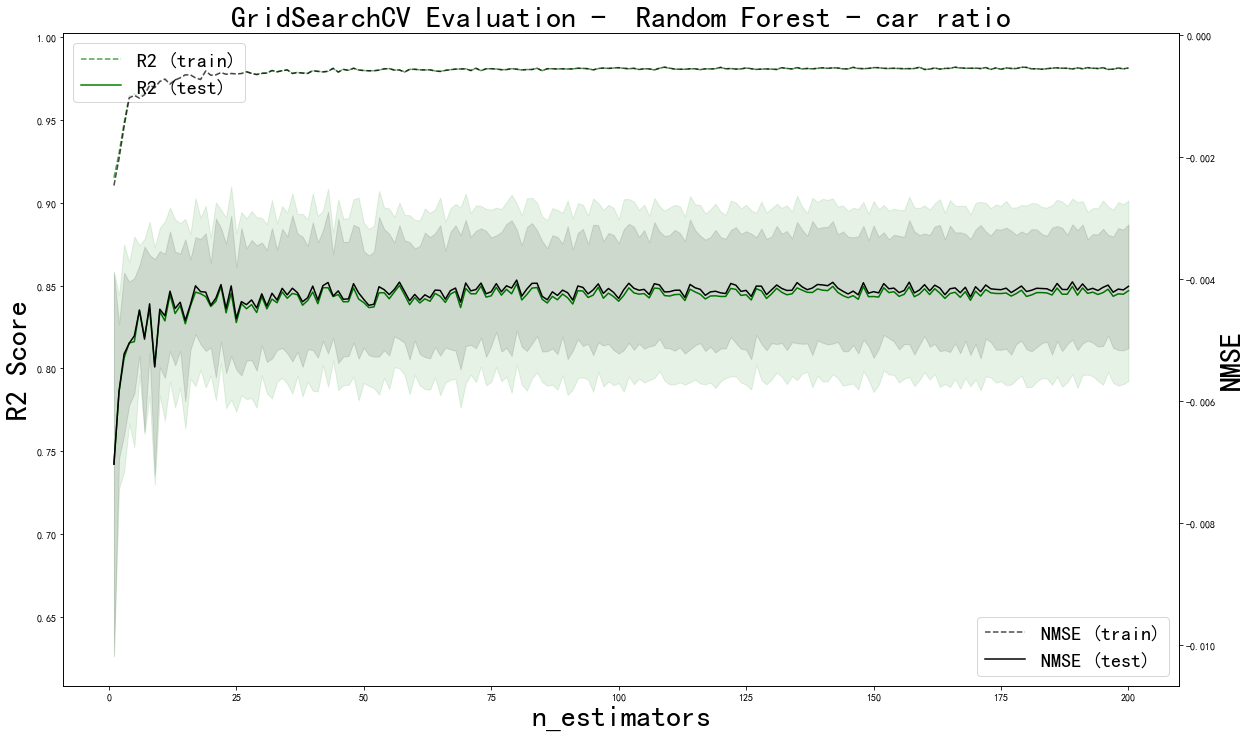

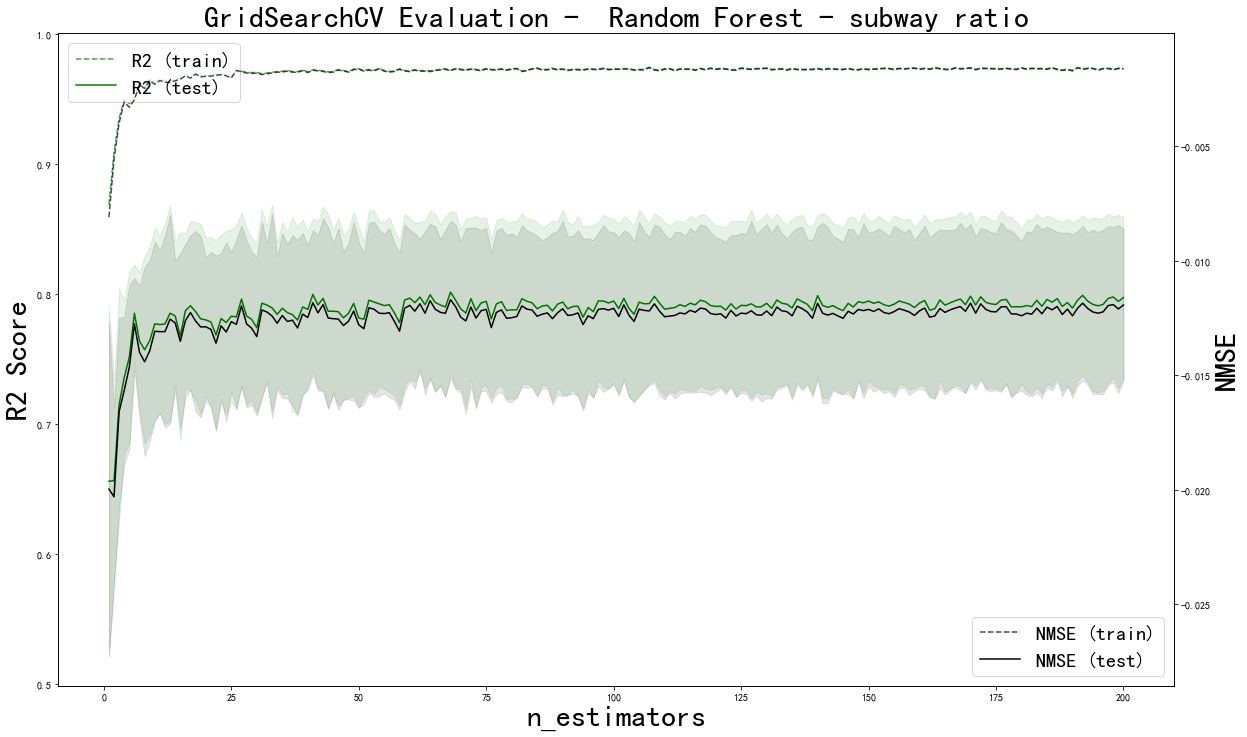

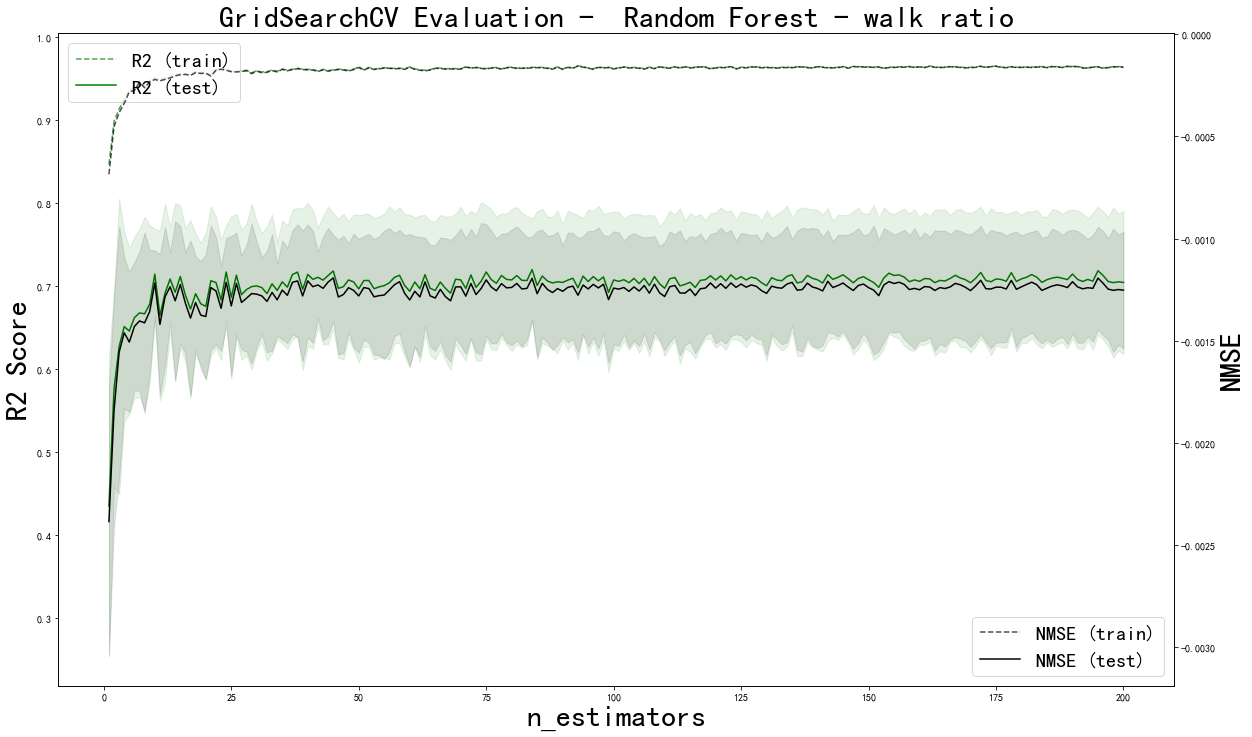

In [43]:
for k,v in results_dict_rf_gs.items():
    title = "Random Forest - " + k[6:]+' '+k[:5]
    plot_train_test_score(v, range(1,201),title, "n_estimators", 2, 4)

#### 模型函数RandomizedSearchCV

In [44]:
from sklearn.model_selection import RandomizedSearchCV

In [45]:
def rf_model_rando(X, y):
    
    ##参数范围
    n_estimators = [int(x) for x in list(range(5,505))]
    max_features = ['auto', 'sqrt', 'log2']
    max_depth = [int(x) for x in np.linspace(10,110,num=11)]
    max_depth.append(None)
    min_samples_split = [2,5,10]
    
    bootstrap = [True, False]
    
    random_grid = {
        "n_estimators": n_estimators,
        "max_features": max_features,
        "max_depth": max_depth,
        "min_samples_split": min_samples_split,
        "bootstrap":bootstrap
    }
    
    ## 定义CV大小
    folds = KFold(n_splits=5, shuffle=True, random_state=38)
    scoring = {"NMSE": "neg_mean_squared_error", "R2":"r2"}
    model = RandomForestRegressor()
    
    model.fit(X, y)
    model_cv = RandomizedSearchCV(estimator=model,
                                 param_distributions=random_grid,
                                 n_iter=500,
                                 scoring = scoring,
                                 refit = "NMSE",
                                 cv = folds,
                                 n_jobs = -1,
                                 random_state=38)
    
    model_cv.fit(X, y)
    output = pd.DataFrame(model_cv.cv_results_)
    return output

In [46]:
results_dict_rf_rs = {x:0 for x in Y.columns}
for key in results_dict_rf_rs.keys():
    results = rf_model_rando(X_train, Y_train[key])
    results_dict_rf_rs[key] = results

## Support Vector Regression

### 模型函数 GridSearchCV

In [47]:
from sklearn.svm import SVR

In [48]:
def svr_model_gridsearch(X,y):
    gamma = np.concatenate((np.arange(0.1, 1, 0.1, dtype= float), 
               np.array(np.arange(0,100,5, dtype= float)[1:]), 
               np.arange(100,1100,100, dtype= float)))
    C = np.concatenate((np.arange(0.1, 1, 0.1, dtype= float), 
           np.array(np.arange(0,100,5, dtype= float)[1:]), 
           np.arange(100,1100,100, dtype= float)))
    
    hyperparam = {'gamma': gamma, 'C':C}
    
    folds = KFold(n_splits=5, shuffle=True, random_state=38)
    scoring = {"NMSE": "neg_mean_squared_error", "R2":"r2"}
    
    ## 定义&耦合模型
    model = SVR()
    model.fit(X,y)
    
    ## 通过GridSearchCV 寻找最优情况
    model_cv = GridSearchCV(estimator=model,
                           param_grid=hyperparam,
                           scoring = scoring,
                           refit = "NMSE",
                           cv = folds,
                           n_jobs = 2,
                           verbose=1,
                           return_train_score=True)
    model_cv.fit(X, y)
    ## 保存结果
    model_output = pd.DataFrame(model_cv.cv_results_)
    return model_output

In [49]:
results_dict_svr_gs = {x:0 for x in Y.columns}
for key in results_dict_svr_gs.keys():
    results = svr_model_gridsearch(X_train, Y_train[key])
    results_dict_svr_gs[key] = results

Fitting 5 folds for each of 1444 candidates, totalling 7220 fits
Fitting 5 folds for each of 1444 candidates, totalling 7220 fits
Fitting 5 folds for each of 1444 candidates, totalling 7220 fits
Fitting 5 folds for each of 1444 candidates, totalling 7220 fits


In [50]:
results_dict_svr_gs[k].drop_duplicates('param_C')

mean_fit_time  std_fit_time  mean_score_time  std_score_time param_C   
0          0.001533      0.000543         0.001299        0.000401     0.1  \
38         0.001300      0.000401         0.001722        0.000622     0.2   
76         0.001501      0.000450         0.001702        0.000605     0.3   
114        0.001404      0.000482         0.001198        0.000401     0.4   
152        0.001601      0.000483         0.001596        0.000489     0.5   
190        0.001398      0.000491         0.001302        0.000607     0.6   
228        0.001101      0.000203         0.001399        0.000486     0.7   
266        0.001703      0.000607         0.001397        0.000489     0.8   
304        0.001299      0.000400         0.001204        0.000395     0.9   
342        0.001597      0.000798         0.001200        0.000508     5.0   
380        0.001598      0.000596         0.001594        0.000378    10.0   
418        0.000998      0.000631         0.001900        0.000495    15.0   
456        0.001099      0.000203         0.001200        0.000397    20.0   
494        0.001208      0.000408         0.001111        0.000226    25.0   
532        0.001709      0.000615         0.001197        0.000399    30.0   
570        0.001499      0.000446         0.001099        0.000204    35.0   
608        0.001297      0.000399         0.001596        0.000489    40.0   
646        0.000998      0.000631         0.001708        0.000615    45.0   
684        0.001898      0.000196         0.001207        0.000420    50.0   
722        0.001503      0.000439         0.001284        0.000395    55.0   
760        0.001298      0.000399         0.001401        0.000374    60.0   
798        0.001400      0.000581         0.001399        0.000488    65.0   
836        0.001200      0.000399         0.001298        0.000400    70.0   
874        0.002004      0.000711         0.001596        0.000489    75.0   
912        0.001499      0.000446         0.001111        0.000197    80.0   
950        0.001100      0.000203         0.001404        0.000484    85.0   
988        0.001797      0.000399         0.001099        0.000204    90.0   
1026       0.001605      0.000586         0.001600        0.000491    95.0   
1064       0.001497      0.000446         0.001100        0.000662   100.0   
1102       0.001797      0.000400         0.001303        0.000613   200.0   
1140       0.001701      0.000605         0.001098        0.000201   300.0   
1178       0.001598      0.000490         0.001697        0.000601   400.0   
1216       0.001106      0.000667         0.001301        0.000606   500.0   
1254       0.001399      0.000491         0.001099        0.000202   600.0   
1292       0.001479      0.000448         0.001300        0.000400   700.0   
1330       0.001500      0.000445         0.001198        0.000398   800.0   
1368       0.001099      0.000487         0.001601        0.000584   900.0   
1406       0.001100      0.000204         0.001000        0.000004  1000.0   

     param_gamma                                    params  split0_test_NMSE   
0            0.1                  {'C': 0.1, 'gamma': 0.1}         -0.003220  \
38           0.1                  {'C': 0.2, 'gamma': 0.1}         -0.002959   
76           0.1  {'C': 0.30000000000000004, 'gamma': 0.1}         -0.002773   
114          0.1                  {'C': 0.4, 'gamma': 0.1}         -0.002694   
152          0.1                  {'C': 0.5, 'gamma': 0.1}         -0.002651   
190          0.1                  {'C': 0.6, 'gamma': 0.1}         -0.002625   
228          0.1   {'C': 0.7000000000000001, 'gamma': 0.1}         -0.002585   
266          0.1                  {'C': 0.8, 'gamma': 0.1}         -0.002490   
304          0.1                  {'C': 0.9, 'gamma': 0.1}         -0.002351   
342          0.1                  {'C': 5.0, 'gamma': 0.1}         -0.002391   
380          0.1                 {'C': 10.0, 'gamma': 0.1}         -0.002391   
418

#### 3D 可视化 GridSearch 

In [51]:
results

mean_fit_time  std_fit_time  mean_score_time  std_score_time param_C   
0          0.001533      0.000543         0.001299        0.000401     0.1  \
1          0.001448      0.000461         0.001326        0.000384     0.1   
2          0.001527      0.000618         0.000998        0.000001     0.1   
3          0.001598      0.000491         0.001200        0.000247     0.1   
4          0.001214      0.000392         0.001414        0.000811     0.1   
...             ...           ...              ...             ...     ...   
1439       0.001299      0.000400         0.001301        0.000398  1000.0   
1440       0.001397      0.000488         0.001298        0.000399  1000.0   
1441       0.001406      0.000498         0.001506        0.000646  1000.0   
1442       0.001205      0.000395         0.001399        0.000374  1000.0   
1443       0.001558      0.000542         0.001305        0.000409  1000.0   

     param_gamma                                    params  split0_test_NMSE   
0            0.1                  {'C': 0.1, 'gamma': 0.1}         -0.003220  \
1            0.2                  {'C': 0.1, 'gamma': 0.2}         -0.002992   
2            0.3  {'C': 0.1, 'gamma': 0.30000000000000004}         -0.002823   
3            0.4                  {'C': 0.1, 'gamma': 0.4}         -0.002788   
4            0.5                  {'C': 0.1, 'gamma': 0.5}         -0.002768   
...          ...                                       ...               ...   
1439       600.0             {'C': 1000.0, 'gamma': 600.0}         -0.003959   
1440       700.0             {'C': 1000.0, 'gamma': 700.0}         -0.003959   
1441       800.0             {'C': 1000.0, 'gamma': 800.0}         -0.003959   
1442       900.0             {'C': 1000.0, 'gamma': 900.0}         -0.003959   
1443      1000.0            {'C': 1000.0, 'gamma': 1000.0}         -0.003959   

      split1_test_NMSE  split2_test_NMSE  ...  mean_test_R2  std_test_R2   
0            -0.003268         -0.005212  ...      0.120894     0.076514  \
1            -0.003201         -0.005213  ...      0.142588     0.087561   
2            -0.003175         -0.005147  ...      0.161380     0.096132   
3            -0.003187         -0.005150  ...      0.163774     0.103321   
4            -0.003148         -0.005122  ...      0.170271     0.107174   
...                ...               ...  ...           ...          ...   
1439         -0.004137         -0.005835  ...     -0.045027     0.065408   
1440         -0.004137         -0.005835  ...     -0.045044     0.065405   
1441         -0.004137         -0.005835  ...     -0.045051     0.065404   
1442         -0.004137         -0.005835  ...     -0.045054     0.065403   
1443         -0.004137         -0.005835  ...     -0.045056     0.065403   

      rank_test_R2  split0_train_R2  split1_train_R2  split2_train_R2   
0              342         0.143849         0.183058         0.144189  \
1              341         0.181185         0.203645         0.145935   
2              339         0.200878         0.221791         0.166614   
3              338         0.201462         0.224446         0.179686   
4              300         0.212421         0.234338         0.188288   
...            ...              ...              ...              ...   
1439          1255         0.027914         0.042078         0.024487   
1440          1293         0.027897         0.042075         0.024486   
1441          1331         0.027889         0.042074         0.024015   
1442          1369         0.027886         0.042074         0.024015   
1443          1407         0.027884         0.042074         0.024015   

      split3_train_R2  split4_train_R2  mean_train_R2  std_train_R2  
0            0.156874         0.194012       0.164397      0.020555  
1            0.209405         0.206005       0.189235      0.023814  
2            0.223622         0.239108       0.210402      0.025047  
3            0.210186         0.257059

In [52]:
X_valid.columns

Index(['population_density', 'bus_coverage_rate', 'subway_coverage_rate',
       'bus_route_density', 'convinience_store_density', 'supermarket_density',
       'wet_market_density', 'courier_point_density',
       'community_service_facility_density', 'public_service_facility_density',
       'stadium_density', 'residential_building_development_level',
       'public_building_development_level', 'town_road_density',
       'prefectural_road_density', 'national_road_density',
       'expressway_density', 'provincial_road_density', 'road_network_density',
       'highway_density', 'park_coverage_rate', 'job_housing_balance',
       'shopping_center_cluster_parameter_adj',
       'industrial_park_cluster_parameter_adj',
       'corporate&entreprise_cluster_parameter_adj',
       'government_office_cluster_parameter_adj'],
      dtype='object')

In [53]:
def svr_3d(results, title):

    fig = plt.figure(figsize=(20,12))

    ax = fig.add_subplot(111, projection='3d')
    ## test_size
    ax.scatter(results.param_C,
            results.param_gamma,
            results.mean_test_R2,
            color ='#9acd32', 
            label = 'R2 - test'  
              )
    ## train_size
    ax.scatter(results.param_C,
            results.param_gamma,
            results.mean_train_R2,
            color = (0.2, 0.2, 0.2),
            label = 'R2 - train'
              )
    
    ## 设置标题
    ax.set_title("GridSearchCV Evaluation - SVR - %s" % title, fontsize=30, x=0.5, y=1.02)    

    ## 设置数轴名
    ax.set_xlabel('C',fontsize=20)
    ax.set_ylabel('Gamma',fontsize=20)
    ax.set_zlabel('RSquared',fontsize=20)
    
    ## 设置legend
    ax.legend(loc='upper right', fontsize=15, bbox_to_anchor=(0.95, 0.78))
    
    ## 设置图像格式
    plt.tight_layout()
    fig.set_facecolor('white')
    plt.savefig('svr_3d_plot_R2_%s.png'%title)
    plt.show()

In [54]:
results_dict_scr_gs = {}

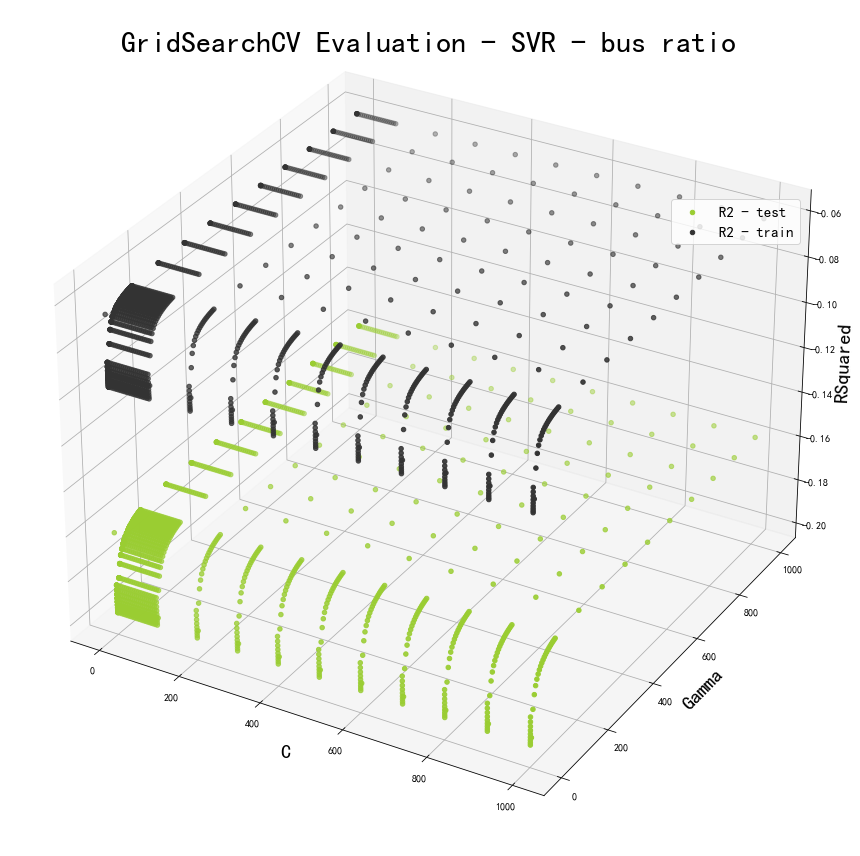

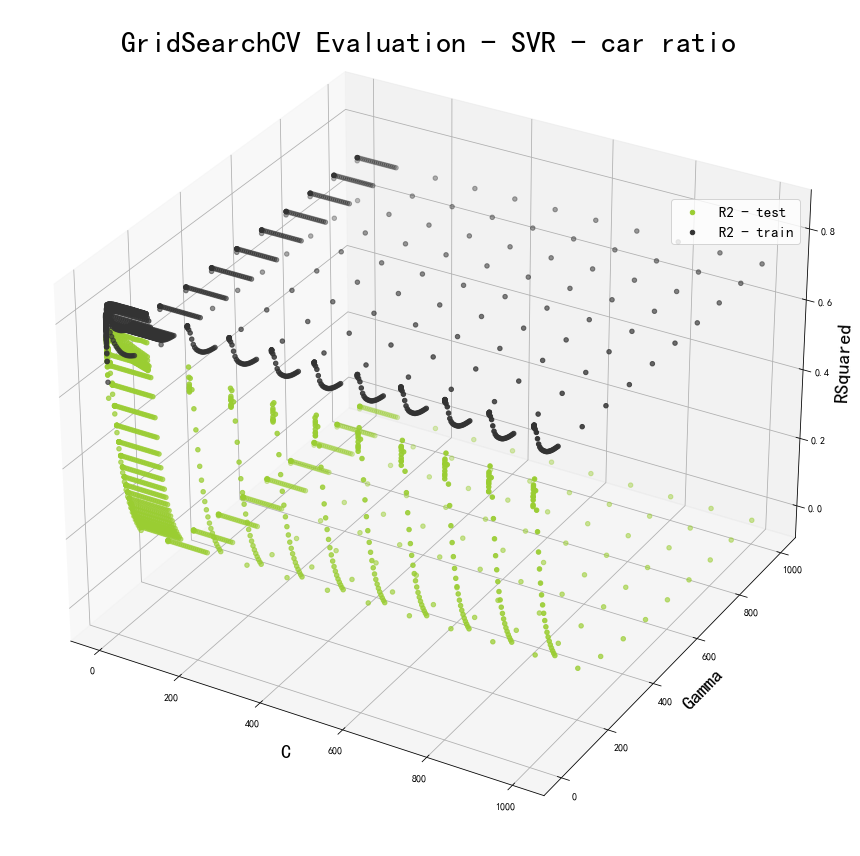

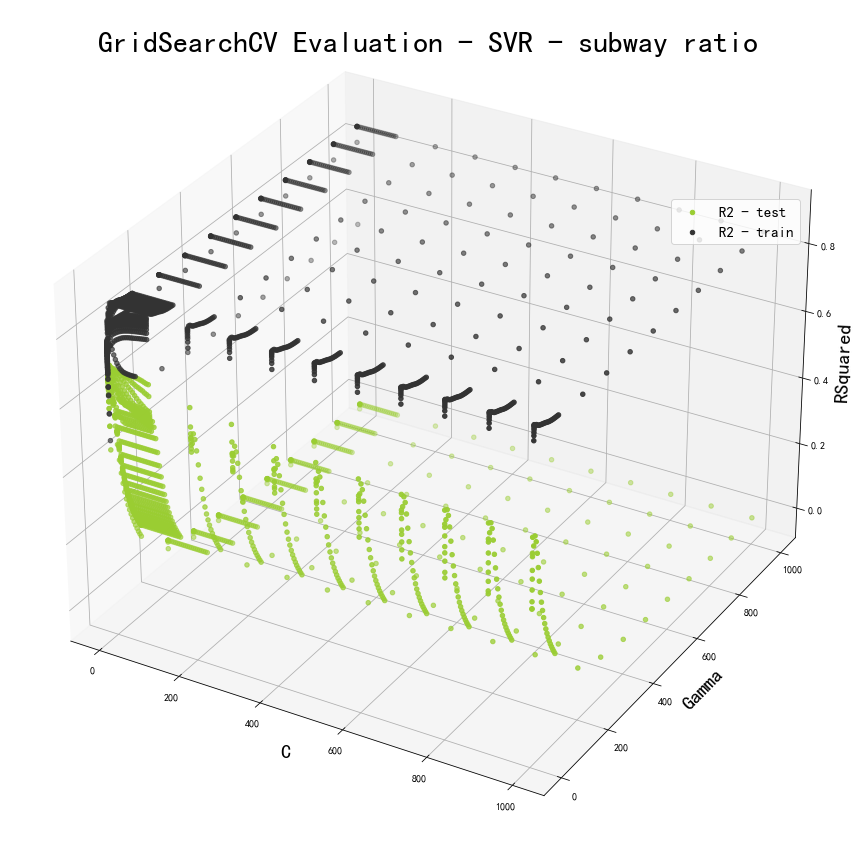

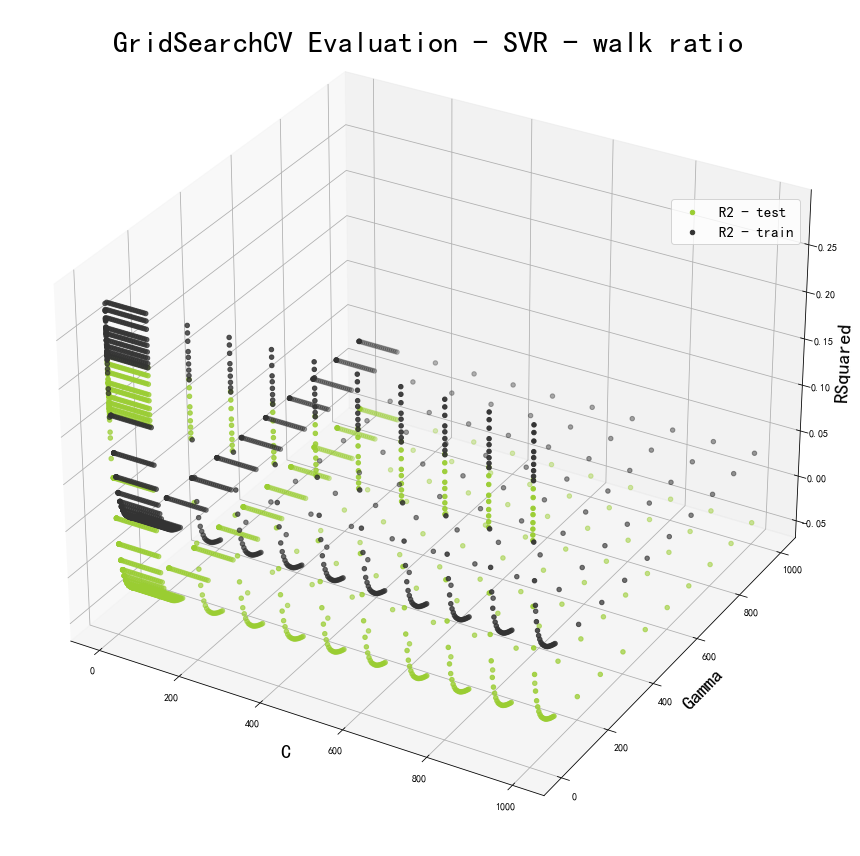

In [55]:
for k,v in results_dict_svr_gs.items():
    title = k[6:]+' '+k[:5]
    svr_3d(v,title)

### 模型函数 RandomizedSearchCV

In [56]:
def svr_model_randosearch(X, y):
    ## 定义Hyperparameters
    kernel = ['linear','poly','rbf','sigmoid']
    degree = list(range(2,15))
    gamma = np.arange(0.5,200,0.5)
    C = np.arange(0.5,200,0.5)
    
    random_grid = {
        "kernel": kernel,
        "degree": degree,
        "gamma": gamma,
        "C": C
    }
    
    folds = KFold(n_splits=5, shuffle=True, random_state=38)
    scoring = {"NMSE": "neg_mean_squared_error", "R2":"r2"}
    
    ## 定义&耦合模型
    model = SVR()
    model.fit(X,y)

    ## 通过GridSearchCV 寻找最优情况
    model_cv = RandomizedSearchCV(estimator = model,
                                  param_distributions = random_grid,
                                  scoring = scoring,
                                  n_iter = 10000,
                                  refit = "NMSE",
                                  cv = folds,
                                  n_jobs = 2,
                                  verbose=1,
                                  return_train_score=True,
                                  random_state=38)
    model_cv.fit(X, y)
    ## 保存结果
    model_output = pd.DataFrame(model_cv.cv_results_)

    return model_output

In [57]:
results_dict_svr_random = {x:0 for x in Y.columns}
for key in results_dict_svr_random.keys():
    results = svr_model_randosearch(X_train, Y_train[key])
    results_dict_svr_random[key] = results

Fitting 5 folds for each of 10000 candidates, totalling 50000 fits
Fitting 5 folds for each of 10000 candidates, totalling 50000 fits
Fitting 5 folds for each of 10000 candidates, totalling 50000 fits
Fitting 5 folds for each of 10000 candidates, totalling 50000 fits


# 模型结果对比

In [59]:
## 整合模型结果
model_results = {'lasso':results_dict_lasso, 'prunning':results_dict_pr, 
                 'rf_gridsearch': results_dict_rf_gs, 
                 'rf_randomsearch':results_dict_rf_rs,
                 'svr_gridsearch': results_dict_svr_gs,
                 'scr_randomsearch': results_dict_svr_random
                }


In [60]:
## 呈现模型表现并提取每种模型中最优参数
best_r2s = []
for k1,v1 in model_results.items():
    for k2, v2 in v1.items():
        best_row = pd.DataFrame(v2.loc[v2['mean_test_R2'].idxmax()]).transpose()\
        [['params','mean_test_R2','mean_test_NMSE']]
        best_row['model'] = k1
        best_row['mode'] = k2[6:]
        best_r2s.append(best_row)
best_r2s = pd.concat(best_r2s, axis=0)

In [62]:
best_r2s

params mean_test_R2   
0                                     {'alpha': 0.0001}     0.287301  \
0                                     {'alpha': 0.0001}     0.750172   
0                                     {'alpha': 0.0001}      0.67309   
0                                     {'alpha': 0.0001}     0.617861   
25                         {'n_features_to_select': 26}     0.114203   
8                           {'n_features_to_select': 9}     0.727143   
9                          {'n_features_to_select': 10}     0.646685   
19                         {'n_features_to_select': 20}     0.522372   
32                                 {'n_estimators': 33}     0.482482   
79                                 {'n_estimators': 80}     0.851066   
67                                 {'n_estimators': 68}     0.801504   
83                                 {'n_estimators': 84}     0.719654   
484   {'n_estimators': 214, 'min_samples_split': 5, ...     0.466956   
425   {'n_estimators': 115, 'min_samples_split': 5, ...     0.852758   
461   {'n_estimators': 119, 'min_samples_split': 2, ...     0.811395   
467   {'n_estimators': 27, 'min_samples_split': 5, '...     0.741094   
37                          {'C': 0.1, 'gamma': 1000.0}    -0.157722   
418                           {'C': 15.0, 'gamma': 0.1}     0.771361   
345                            {'C': 5.0, 'gamma': 0.4}     0.709322   
304                            {'C': 0.9, 'gamma': 0.1}       0.2293   
1369  {'kernel': 'rbf', 'gamma': 199.5, 'degree': 11...    -0.158253   
2047  {'kernel': 'linear', 'gamma': 97.5, 'degree': ...     0.759132   
5733  {'kernel': 'rbf', 'gamma': 1.5, 'degree': 5, '...     0.704304   
4     {'kernel': 'linear', 'gamma': 42.5, 'degree': ...     0.235642   

     mean_test_NMSE             model    mode  
0         -0.001487             lasso     bus  
0          -0.00714             lasso     car  
0         -0.019498             lasso  subway  
0         -0.001688             lasso    walk  
25        -0.001878          prunning     bus  
8         -0.007845          prunning     car  
9          -0.02107          prunning  subway  
19        -0.002066          prunning    walk  
32        -0.001063     rf_gridsearch     bus  
79        -0.004021     rf_gridsearch     car  
67        -0.011695     rf_gridsearch  subway  
83        -0.001194     rf_gridsearch    walk  
484       -0.001076   rf_randomsearch     bus  
425          -0.004   rf_randomsearch     car  
461       -0.011087   rf_randomsearch  subway  
467       -0.001103   rf_randomsearch    walk  
37        -0.002335    svr_gridsearch     bus  
418        -0.00623    svr_gridsearch     car  
345       -0.017295    svr_gridsearch  subway  
304       -0.003392    svr_gridsearch    walk  
1369      -0.002336  scr_randomsearch     bus  
2047      -0.006626  scr_randomsearch     car  
5733      -0.017603  scr_randomsearch  subway  
4         -0.003363  scr_randomsearch    walk

In [63]:
best_r2s.to_excel('best_performances_all_model.xlsx')

## 模型最终选取成果

In [64]:
## 设置最佳选项filter进行筛选，选出最终模型成果
mask = best_r2s.groupby('mode')['mean_test_R2'].transform(max) == best_r2s['mean_test_R2']
model_selection_final = best_r2s[mask]
model_selection_final.to_excel("model_selection.xlsx")
model_selection_final

params mean_test_R2   
32                                {'n_estimators': 33}     0.482482  \
425  {'n_estimators': 115, 'min_samples_split': 5, ...     0.852758   
461  {'n_estimators': 119, 'min_samples_split': 2, ...     0.811395   
467  {'n_estimators': 27, 'min_samples_split': 5, '...     0.741094   

    mean_test_NMSE            model    mode  
32       -0.001063    rf_gridsearch     bus  
425         -0.004  rf_randomsearch     car  
461      -0.011087  rf_randomsearch  subway  
467      -0.001103  rf_randomsearch    walk

In [65]:
model_selection_final.to_excel('best_performances_selected_model.xlsx')

## 根据成果刷新模型
根据rf_gridsearch成果刷新rf_randomsearch


In [66]:
def rf_model_rando_update(X, y, n_estimators):
    
    ##参数范围
    max_features = ['auto', 'sqrt', 'log2']
    max_depth = [int(x) for x in np.linspace(2,152)]
    max_depth.append(None)
    min_samples_split = list(range(10))
    
    bootstrap = [True, False]
    
    random_grid = {
        "max_features": max_features,
        "max_depth": max_depth,
        "min_samples_split": min_samples_split,
        "bootstrap":bootstrap
    }
    
    ## 定义CV大小
    folds = KFold(n_splits=5, shuffle=True, random_state=38)
    scoring = {"NMSE": "neg_mean_squared_error", "R2":"r2"}
    model = RandomForestRegressor(n_estimators=n_estimators)
    
    model.fit(X, y)
    model_cv = RandomizedSearchCV(estimator=model,
                                 param_distributions=random_grid,
                                 n_iter=1000,
                                 scoring = scoring,
                                 refit = "NMSE",
                                 cv = folds,
                                 n_jobs = -1,
                                 random_state=38)
    
    model_cv.fit(X, y)
    output = pd.DataFrame(model_cv.cv_results_)
    return output

In [67]:
## 重新hyperparameter tunning, given random_state
update_rf_bus = rf_model_rando_update(X_train, Y_train['ratio_bus'],33)
update_rf_bus = pd.DataFrame(update_rf_bus.\
                             loc[update_rf_bus['mean_test_R2'].idxmax()]).transpose()\
                             [['params','mean_test_R2','mean_test_NMSE']]

D:\python\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:372: FitFailedWarning: 
1105 fits failed out of a total of 5000.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
290 fits failed with the following error:
Traceback (most recent call last):
  File "D:\python\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "D:\python\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py", line 450, in fit
    trees = Parallel(
  File "D:\python\anaconda3\lib\site-packages\joblib\parallel.py", line 1043, in __call__
    if self.dispatch_one_batch(iterator):
  File "D:\python\anaconda3\lib\site-packages\joblib\parallel.py", l

In [68]:
## 更新信息
update_rf_bus['mode'] = 'bus'
update_rf_bus['model'] = 'rf_randomsearch'
model_selection_final_update = pd.concat([update_rf_bus, model_selection_final],axis=0)
list(model_selection_final_update.iloc[0:,:]['params'])[0]['n_estimator'] = 33

In [73]:
model_selection_final_update

params mean_test_R2   
112  {'min_samples_split': 6, 'max_features': 'auto...     0.446879  \
32                                {'n_estimators': 33}     0.482482   
425  {'n_estimators': 115, 'min_samples_split': 5, ...     0.852758   
461  {'n_estimators': 119, 'min_samples_split': 2, ...     0.811395   
467  {'n_estimators': 27, 'min_samples_split': 5, '...     0.741094   

    mean_test_NMSE    mode            model  
112      -0.001128     bus  rf_randomsearch  
32       -0.001063     bus    rf_gridsearch  
425         -0.004     car  rf_randomsearch  
461      -0.011087  subway  rf_randomsearch  
467      -0.001103    walk  rf_randomsearch

In [74]:
model_selection_final_update.to_excel('best_performances_selected_model_updated.xlsx')

## 验证模型成果

### Random Forest with Gridsearch - Bus

In [75]:
from sklearn.metrics import r2_score, mean_squared_error 

In [76]:
rf1 = RandomForestRegressor(n_estimators=33, random_state=38)
rf1.fit(X_train, Y_train['ratio_bus'])
r2_score(Y_valid['ratio_bus'], np.array(rf1.predict(X_valid)))

0.5102664589745214

### Random Forest with Randomsearch - Bus

In [77]:
print(model_selection_final_update['params'].iloc[0])

{'min_samples_split': 6, 'max_features': 'auto', 'max_depth': 145, 'bootstrap': True, 'n_estimator': 33}


In [78]:
rf2 = RandomForestRegressor(n_estimators=33, min_samples_split=6,
                           max_features='auto', max_depth=145, bootstrap=True)
rf2.fit(X_train, Y_train['ratio_bus'])
r2_score(Y_valid['ratio_bus'], np.array(rf2.predict(X_valid)))

0.4345785083991516

### Random Forest with Randomsearch -Car

In [79]:
print(model_selection_final_update['params'].iloc[2])

{'n_estimators': 115, 'min_samples_split': 5, 'max_features': 'log2', 'max_depth': 40, 'bootstrap': False}


In [80]:
rf3 = RandomForestRegressor(n_estimators=115, min_samples_split=5,
                           max_features='log2', max_depth=40, bootstrap=False)
rf3.fit(X_train, Y_train['ratio_car'])
r2_score(Y_valid['ratio_car'], np.array(rf3.predict(X_valid)))

0.8940347789139227

### Random Forest with Random Search - Subway

In [81]:
print(model_selection_final_update['params'].iloc[3])

{'n_estimators': 119, 'min_samples_split': 2, 'max_features': 'log2', 'max_depth': None, 'bootstrap': False}


In [82]:
rf4 = RandomForestRegressor(n_estimators=119, min_samples_split=2,
                           max_features='log2', max_depth=None, bootstrap=False)
rf4.fit(X_train, Y_train['ratio_subway'])
r2_score(Y_valid['ratio_subway'], np.array(rf4.predict(X_valid)))

0.8724724233997677

### Random Forest with Random Search - Walk

In [83]:
print(model_selection_final_update['params'].iloc[4])

{'n_estimators': 27, 'min_samples_split': 5, 'max_features': 'sqrt', 'max_depth': 70, 'bootstrap': True}


In [84]:
rf5 = RandomForestRegressor(n_estimators=27, min_samples_split=5,
                           max_features='sqrt', max_depth=70, bootstrap=True)
rf5.fit(X_train, Y_train['ratio_walk'])
r2_score(Y_valid['ratio_walk'], np.array(rf5.predict(X_valid)))

0.7824253192051545

## 模型成果分析-重要性

## 模型成果分析 -- 准确性可视化

In [86]:
import shap

Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)


In [87]:
# Load the TreeExplainer for the random forest model
explainer = shap.TreeExplainer(rf2)

# Calculate SHAP values for the input data
shap_values = explainer.shap_values(X_valid)

# Create the stacked force plot
shap.initjs()
shap.force_plot(explainer.expected_value, shap_values, X_valid)

### 基础图像 - Bar&BeeSwarm

In [88]:
model_list = {'Bus Ratio': rf2, 'Car Ratio':rf3,
              'Subway Ratio':rf4, 'Walk Ratio':rf5}

In [89]:
## Define new colormap 
color_list = ["#808080","#C1F80A","#FFFF14"]
custom_cmap = create_custom_colormap(color_list)

In [90]:
def shap_bar_chart(model, title):
    ## 准备绘图数据
    explainer = shap.TreeExplainer(model)
    shap_values = explainer.shap_values(X_valid)
    ## 绘制图像:bar chart
    shap.summary_plot(shap_values, X_valid, show = False,
                     plot_type = 'bar',max_display=15, color = '#9acd32')
    ##加标题并展示图像
    plt.title('Importance Bar Chart %s'%title, fontsize = 30)
    plt.gca().set_facecolor('white')
    plt.savefig('Importance_Barchart_%s'%(title[:-6]), bbox_inches='tight')
    plt.show()

In [91]:
def shap_beeswarm_chart(model, title):
    ## 准备绘图数据
    explainer = shap.TreeExplainer(model)
    shap_values = explainer.shap_values(X_valid)
    ## 绘制图像：Beeswarm chart
    shap.summary_plot(shap_values,X_valid, max_display=15, cmap=custom_cmap,show=False)
    ## 加标题并展示图像
    plt.title('Importance Beeswarm Chart %s'%title, fontsize=30, pad=20)
    plt.gca().set_facecolor('white')
    plt.tight_layout()
    plt.savefig('Importance_Beeswarm_%s'%(title[:-6]), bbox_inches='tight')
    plt.show()

In [92]:
## 保存重要性数据
def feature_importance(model,title):
    ## 准备绘图数据
    explainer = shap.TreeExplainer(model)
    shap_values = explainer.shap_values(X_valid)
    ## 计算平均数据
    mean_abs_shap = np.abs(shap_values).mean(axis=0)
    df_importance = pd.DataFrame({'Feature':X_valid.columns, 'Importance':mean_abs_shap})
    return df_importance

In [93]:
df_importance = []
for k,v in model_list.items():
    imp = feature_importance(v,k)
    imp = imp.set_index('Feature')
    imp.columns = [k[:-6]]
    df_importance.append(imp)
df_importance = pd.concat(df_importance,axis=1)
df_importance.to_excel('feature_importance.xlsx')

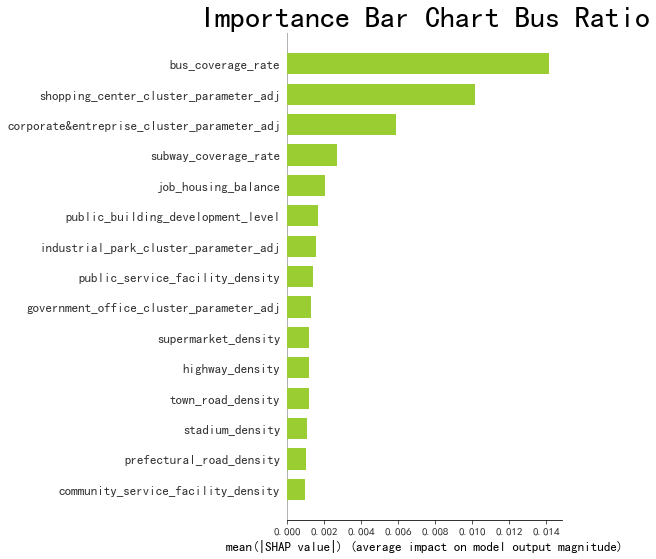

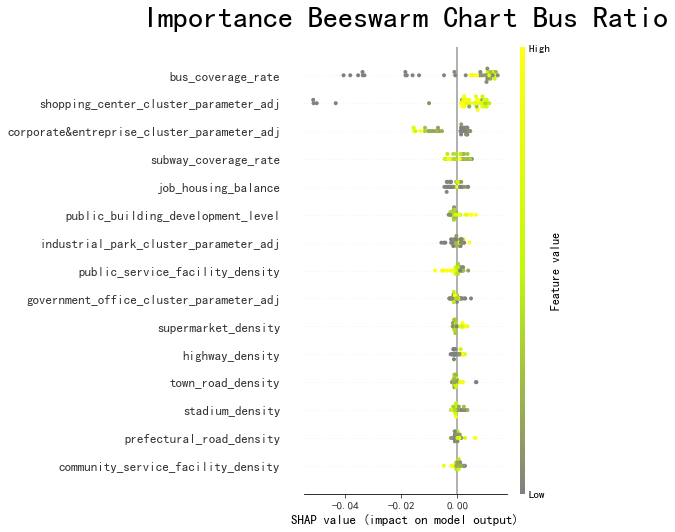

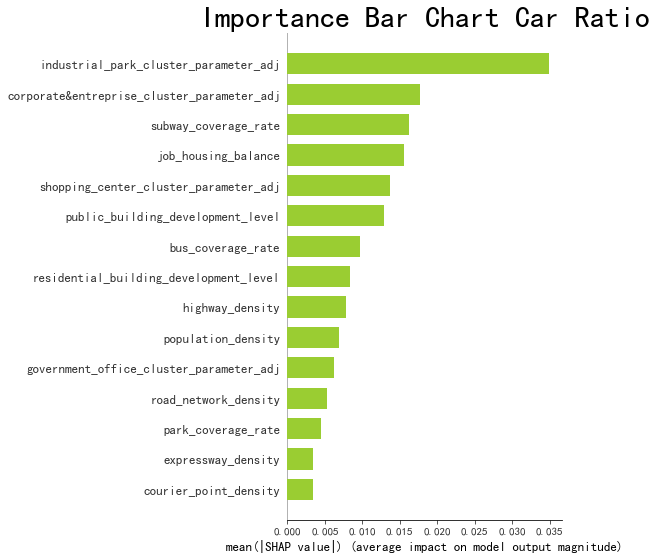

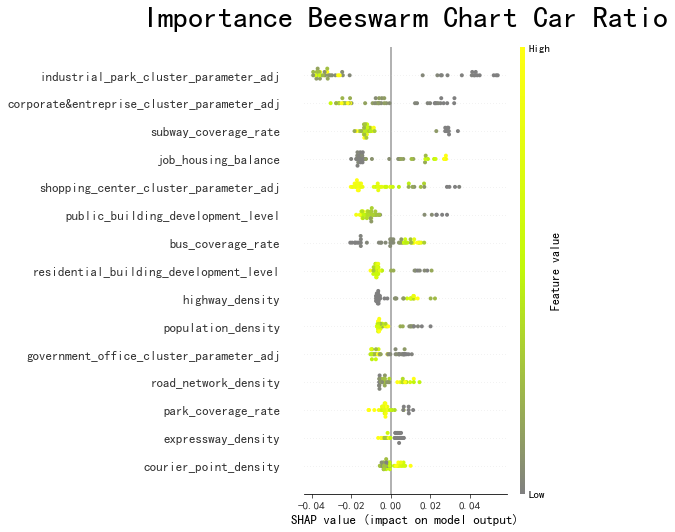

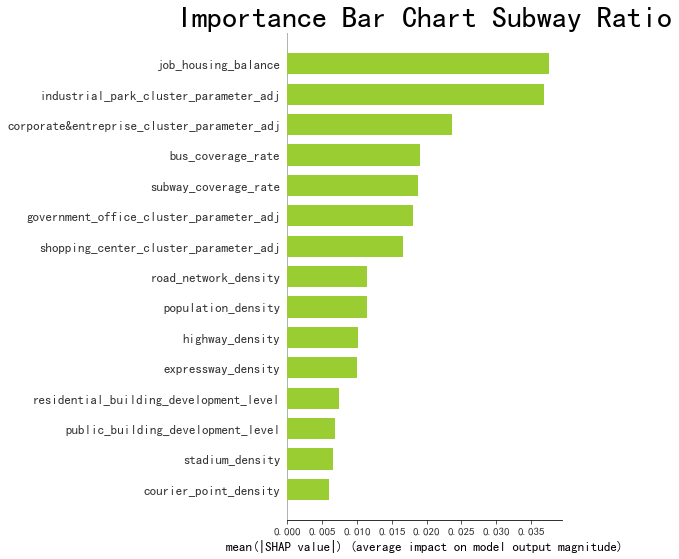

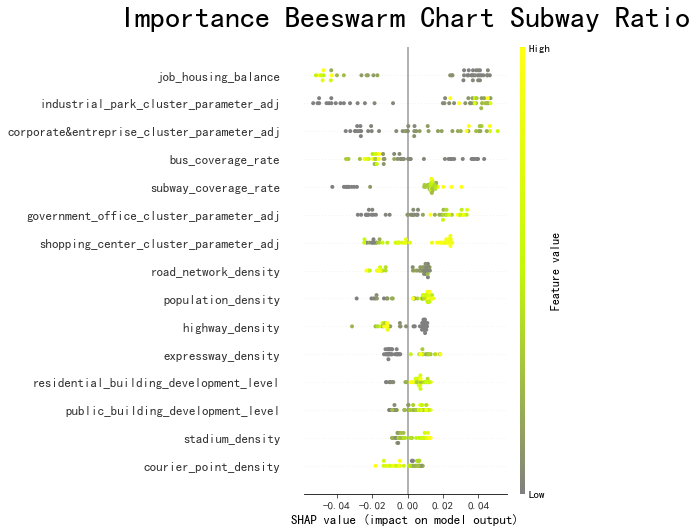

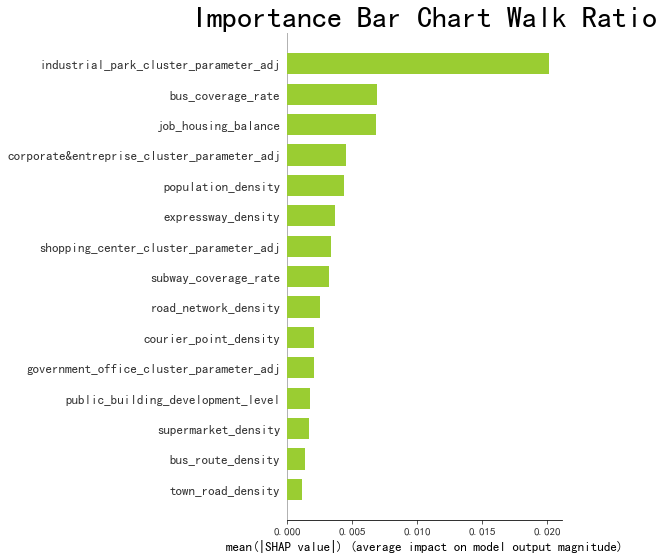

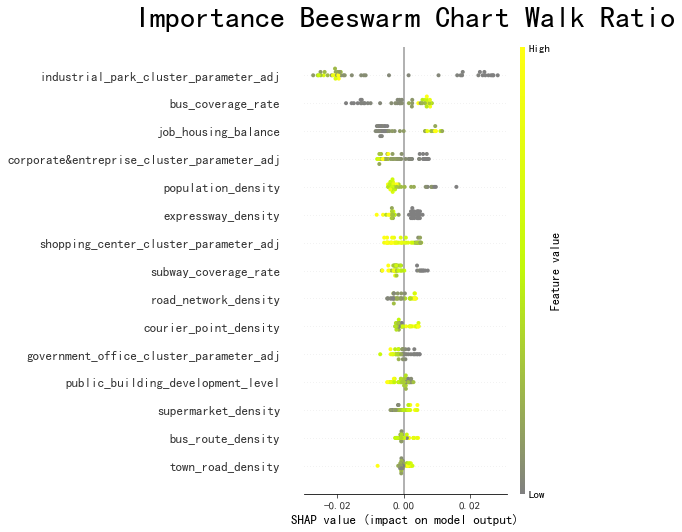

In [94]:
for k,v in model_list.items():
    shap_bar_chart(v,k)
    shap_beeswarm_chart(v,k)

### Stacked Force Plot

In [95]:
model_list

{'Bus Ratio': RandomForestRegressor(max_depth=145, min_samples_split=6, n_estimators=33),
 'Car Ratio': RandomForestRegressor(bootstrap=False, max_depth=40, max_features='log2',
                       min_samples_split=5, n_estimators=115),
 'Subway Ratio': RandomForestRegressor(bootstrap=False, max_features='log2', n_estimators=119),
 'Walk Ratio': RandomForestRegressor(max_depth=70, max_features='sqrt', min_samples_split=5,
                       n_estimators=27)}

In [96]:
## 数据准备 - rf2-bus
explainer = shap.TreeExplainer(rf2)
shap_values = explainer.shap_values(X_valid)
shap.initjs()
shap.force_plot(
    explainer.expected_value,
    shap_values, X_valid, 
    plot_cmap = ['#9acd32','#929591']
)

In [97]:
## 数据准备 - rf3-car
explainer = shap.TreeExplainer(rf3)
shap_values = explainer.shap_values(X_valid)
shap.initjs()
shap.force_plot(
    explainer.expected_value,
    shap_values, X_valid, 
    plot_cmap = ['#9acd32','#929591']
)

In [98]:
## 数据准备 - rf4-subway
explainer = shap.TreeExplainer(rf4)
shap_values = explainer.shap_values(X_valid)
shap.initjs()
shap.force_plot(
    explainer.expected_value,
    shap_values, X_valid, 
    plot_cmap = ['#9acd32','#929591']
)

In [99]:
## 数据准备 - rf5-walk
explainer = shap.TreeExplainer(rf5)
shap_values = explainer.shap_values(X_valid)
shap.initjs()
shap.force_plot(
    explainer.expected_value,
    shap_values, X_valid, 
    plot_cmap = ['#9acd32','#929591']
)

# 虚拟社区

In [119]:
## 提取部分参数
alpha_composition={
#     'facility_parameter':[
#             'convinience_store_density','supermarket_density','wet_market_density',
#             'courier_point_density','community_service_facility_density',
#             'public_service_facility_density','stadium_density'],
#    'building_development':['public_building_development_level','residential_building_development_level'],
#    'public_transportation_coverage':['bus_coverage_rate','subway_coverage_rate'],
#    'bus_coverage_rate':['bus_coverage_rate'],
#    'job_housing_balance':['job_housing_balance'],
#    'park_coverage_rate':['park_coverage_rate'],
   'shopping_center_cluster_parameter_adj':['shopping_center_cluster_parameter_adj'],
   'industrial_park_cluster_parameter_adj':['industrial_park_cluster_parameter_adj'],
   'corporate&entreprise_cluster_parameter_adj':['corporate&entreprise_cluster_parameter_adj'],
   'government_office_cluster_parameter_adj':['government_office_cluster_parameter_adj']
                  }

In [120]:
## 计算均分参数取值范围
subalpha_factor = [x for feature_list in alpha_composition.values() for x in feature_list]
subalpha_range = {x:np.linspace(min(X[x]),max(X[x]),100) for x in subalpha_factor}

In [121]:
quantile_list = np.arange(0.05,1,0.05)

In [122]:
## 计算对应quantile下的出行比例
def get_travel_ratio(model,  alpha, alpha_composition, quantile_list):
    ## 拷贝虚拟社区
    cc = constructed_c.copy()
    cc = pd.DataFrame(cc).T
    subalphas = alpha_composition[alpha]
    
    ## 计算对应feature quantile并产出对应alpha结果
    prediction_list = []
    for i in quantile_list:
        cc = constructed_c.copy()
        cc = pd.DataFrame(cc).T
        ## 赋值
        for subalpha in subalphas:
            new_val = X[subalpha].quantile(i)
            cc[subalpha] = new_val
        ## 预测结果
        prediction = model.predict(cc)
        prediction_list.append(prediction)
    return prediction_list

In [123]:
ratio_range = np.arange(0.3,2,0.05)

In [141]:
def get_travel_ratio2(model,  alpha, alpha_composition, ratio_range):
    ##提取subalphas
    subalphas = alpha_composition[alpha]

    prediction_list = []
    assigned_vals = []
    alpha_list = []
    for i in ratio_range:
        ## 拷贝虚拟社区
        cc = constructed_c.copy()
        cc = pd.DataFrame(cc).T
        for subalpha in subalphas:
            ## 配置新数值
            new_val = cc[subalpha].iloc[0]*i
            cc[subalpha] = new_val
            assigned_vals.append(new_val)
        ## 预测结果
        prediction = model.predict(cc)
        
        prediction_list.append(prediction)
    return prediction_list, assigned_vals

In [142]:
for alpha in alpha_composition.keys():
#     for i in np.arange(0.3,0.7,0.05):
    constructed_c = X.quantile(0.3)
    output,_ = get_travel_ratio2(rf3, alpha, alpha_composition, ratio_range)
    print(alpha, ': ', 'diff: ',max(output)-min(output), 'std: ',np.std(output))

shopping_center_cluster_parameter_adj :  diff:  [0.04879935] std:  0.016675112588753892
industrial_park_cluster_parameter_adj :  diff:  [0.01646796] std:  0.003554841559686705
corporate&entreprise_cluster_parameter_adj :  diff:  [0.01853512] std:  0.00647948129479209
government_office_cluster_parameter_adj :  diff:  [0.00415731] std:  0.0012296667922654756


## 可视化数据

In [151]:
def plot_cc_cluster(model, alpha, alpha_composition, ratio_range, mode):
    constructed_c = X.quantile(0.3)
    predicted_ratios, alpha_vals = get_travel_ratio2(model, alpha, alpha_composition, ratio_range)
    
    fig, ax1 = plt.subplots(figsize = (20,12))
    plt.title("Scenario Analysis - Feature Influence: %s" % alpha, fontsize=30, pad=10)
    
    ## 设置横纵坐标标题
    ax1.set_xlabel(alpha, fontsize=30)
    ax1.set_ylabel('%s Travel Ratio'%mode, fontsize=30)
    
    ## 在ax1上绘制r2训练集和测试集结果 
    ax1.plot(
        alpha_vals,
        predicted_ratios,
        color='g'
    )
    plt.show()

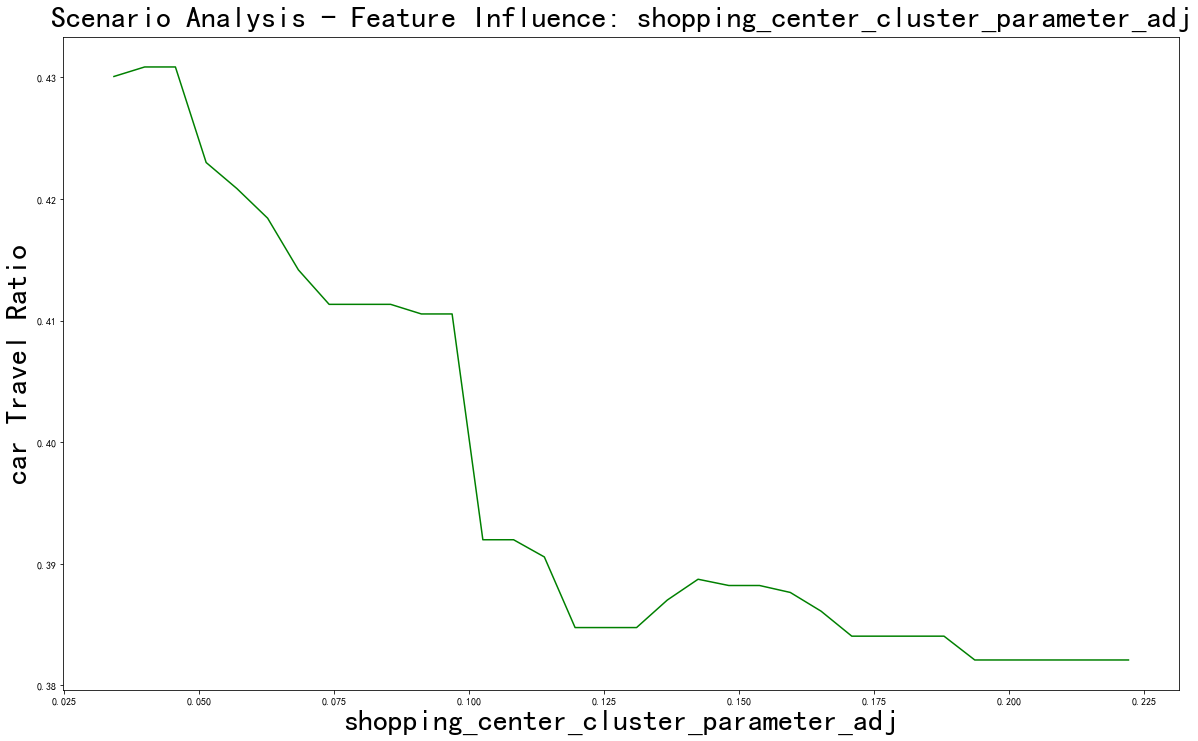

In [152]:
plot_cc_cluster(rf3, 'shopping_center_cluster_parameter_adj',alpha_composition, ratio_range,'car' )